# # Assignment- Clustering & PCA Assignment

### Submitted by Richa Goel

#### Problem Statement:

HELP International is an international humanitarian NGO that is committed to fight poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Step 1: Reading and Understanding the Data
#### Let us first import NumPy and Pandas and read the Country Data Set



In [1]:
# Supress Warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import numpy and Pandas library
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
##Set Display option for rows and column as 120 so that it will display maximum rows and column
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

##### --Read Country Data

In [4]:
## Upload County Data in CSV Format 
country = pd.read_csv(r"C:\Users\Richa\Desktop\upgrad\PCA\CountryAssignment\Country-data.csv")


In [5]:
# Check the head of the dataset
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


######  -Inspecting Values of the Country Data set

In [6]:
# Shape of Country DataFrame
country.shape


(167, 10)

In [7]:
# Check info of Data
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
# Describe Data
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


######  Checking for the missing Values

In [9]:
## Check for missing value in Any Column
round(100*(country.isnull().sum()/len(country.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

###### No Any Missing or Null Values present

In [10]:
## Checking for duplicates
sum(country.duplicated())

0

##### No any duplicate Value found

In [11]:
# unique values for car make name 
country['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

######  No any issue found in the country name and rest columns are numerical so no chance of much ambuigity 

## Step 2: Data Visualisation & EDA 

#### **Understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

##### We'll visualise our data using `matplotlib` and `seaborn`.

In [12]:
## ADDseaborn and matplotlib library
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

##### Let's make a pairplot of all the numeric variables

<Figure size 1800x1800 with 0 Axes>

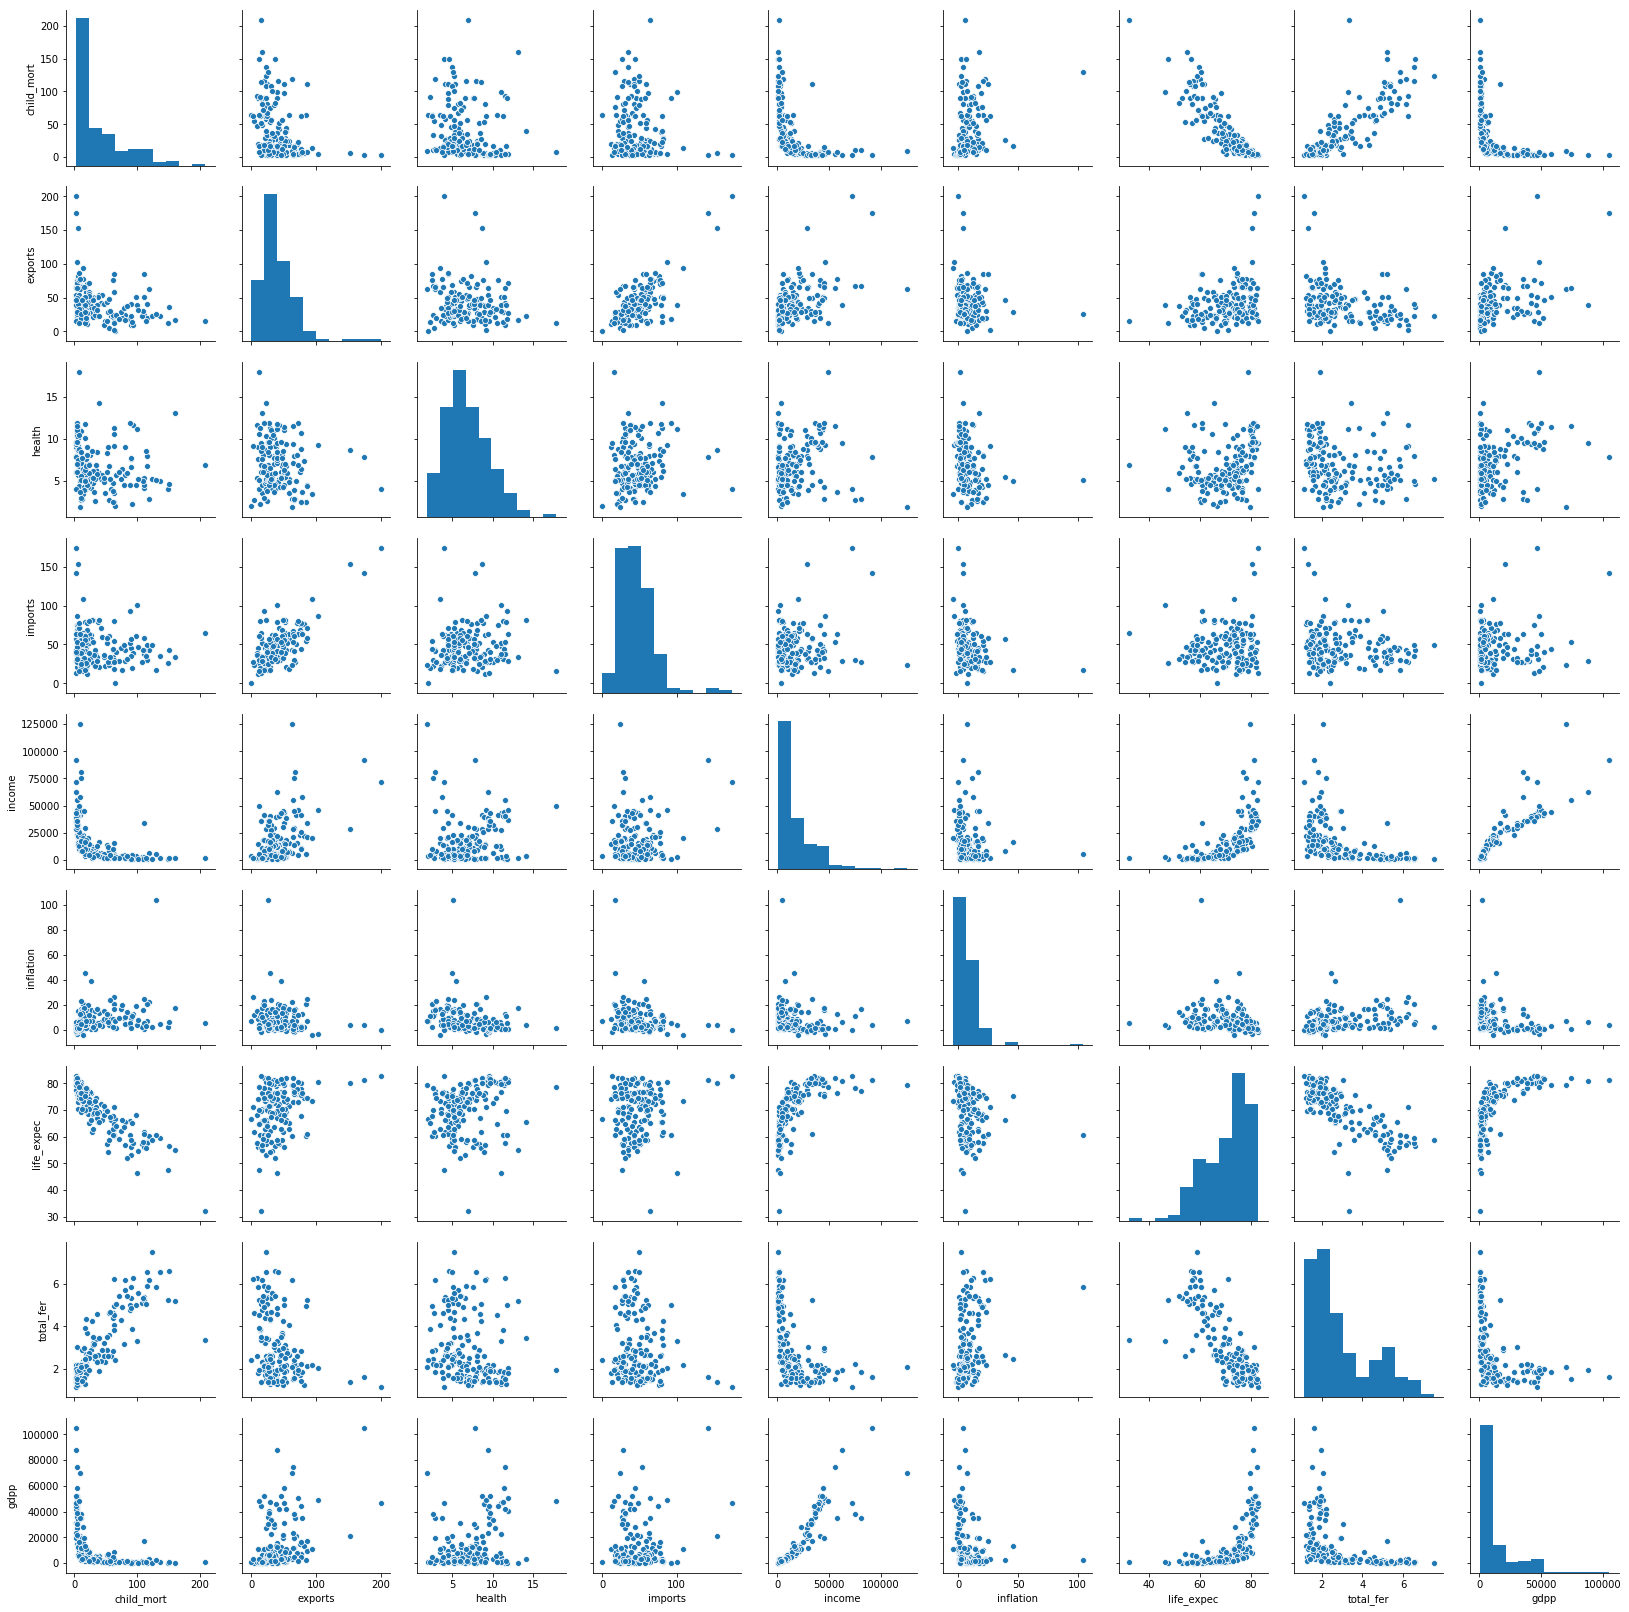

In [13]:
## Scater  Plot for all the numeric vriable 
plt.figure(figsize=(25, 25))

sns.pairplot(country)
plt.show()

#### Now we will draw correlation matrix to have better insight

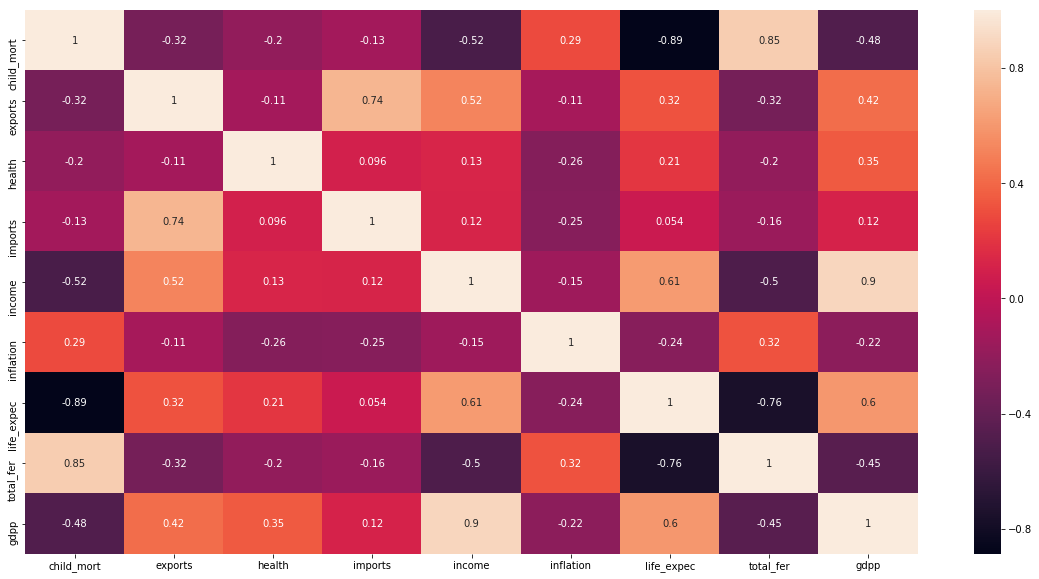

In [14]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(country.corr(),annot = True)

### We can see there is high  correlation between variables. For example 

-> Total fertality and child mortality 
-> income and gdpp
-> income and life expectency
-> exports and imports
-> Life_expertncy and child mortality
-->Total Fertility and life expectency

### As there are lot of high conrrelation between the variable so lets perform PCA to remove multicollinary first before creating culster


## Perform the PCA to remove multicollinearity and reduce dimensions

In [15]:
country_1 = country.copy() ### Create the copy of main data frame Country for future

In [16]:
## before performing PCA analysis lets drop the country from main data frame 

country.drop('country',axis=1,inplace= True)

In [17]:
## Lets perform the scaling before perform PCA

from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec' , 'total_fer' , 'gdpp',]

country[num_vars] = scaler.fit_transform(country[num_vars])

In [20]:
## inspect the data frame after scaling 
country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [21]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [22]:
#Doing the PCA on country data frame
pca.fit(country)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [23]:
##check the PCA component
pca.components_

array([[-0.47646333,  0.17033279,  0.13388598,  0.08161987,  0.30698142,
        -0.08800904,  0.42053483, -0.57108745,  0.33824337],
       [ 0.28173309,  0.46664393,  0.04450977,  0.39425729,  0.40440481,
        -0.00160198, -0.13751974,  0.36924598,  0.47607761],
       [ 0.1000117 , -0.390524  ,  0.78191122, -0.30277481,  0.06836671,
        -0.05702928,  0.00785737,  0.17483647,  0.30963696],
       [ 0.02908132, -0.18848786, -0.51298346, -0.6066558 ,  0.3728225 ,
         0.21262116,  0.14802117,  0.17306242,  0.31044817],
       [ 0.42095743, -0.10579788, -0.08330309, -0.10081385,  0.15996971,
        -0.2195551 , -0.5564373 , -0.62684939,  0.13469013],
       [ 0.08309594,  0.15131228,  0.2081468 , -0.01221525,  0.02247672,
         0.92453091, -0.10955292, -0.23223954, -0.07433502],
       [-0.68892064, -0.06411594,  0.0203469 , -0.01074206,  0.24033746,
         0.02335202, -0.6560359 ,  0.17206635, -0.04950529],
       [-0.05031919, -0.64019218, -0.22728423,  0.54440667, -0

In [24]:
## Lets check the PCA component
colnames = list(country.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'Feature':colnames})
pcs_df

,PC1,PC2,PC3,PC4,Feature
0,-0.476463,0.281733,0.100012,0.029081,child_mort
1,0.170333,0.466644,-0.390524,-0.188488,exports
2,0.133886,0.044510,0.781911,-0.512983,health
3,0.081620,0.394257,-0.302775,-0.606656,imports
4,0.306981,0.404405,0.068367,0.372823,income
5,-0.088009,-0.001602,-0.057029,0.212621,inflation
6,0.420535,-0.137520,0.007857,0.148021,life_expec
7,-0.571087,0.369246,0.174836,0.173062,total_fer
8,0.338243,0.476078,0.309637,0.310448,gdpp


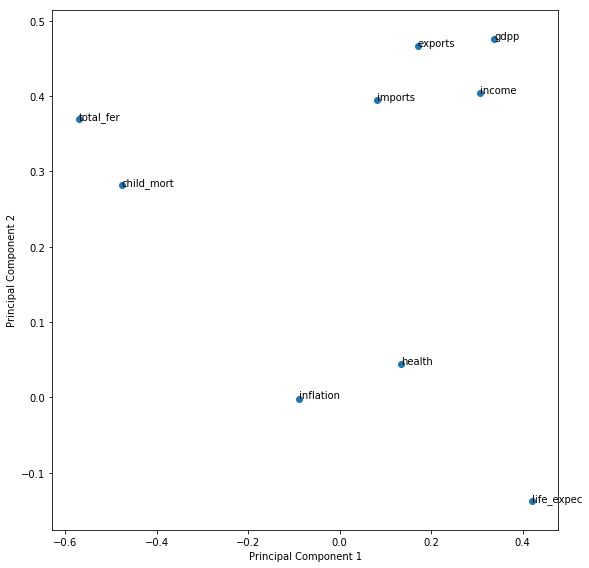

In [25]:
## Scatter Plot between PC 1 and PC 2
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [26]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

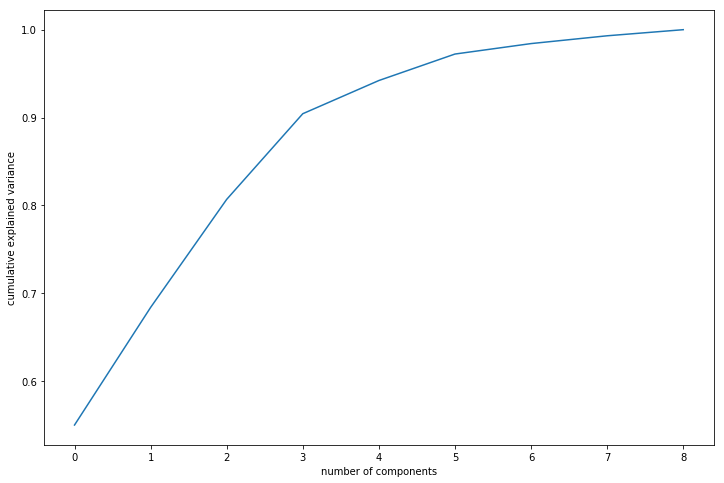

In [27]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

###### PC= 4 is able to cover more than 90% of variance so we will take PC=4.

In [28]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [29]:
### 
df_country_pca = pca_final.fit_transform(country)
df_country_pca.shape

(167, 4)

In [30]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_country_pca.transpose())

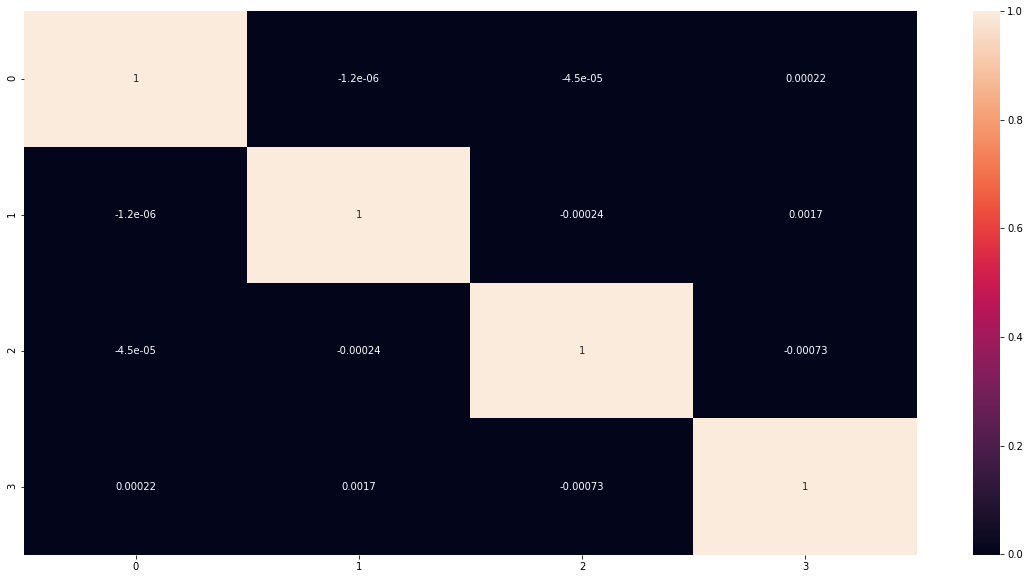

In [31]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#### We can see that correlations are indeed very close to 0 so multicollinearity is almost removed after PCA

In [32]:
# Maximum and Minimum valyes of correlation
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.0016961929884357807 , min corr:  -0.0007334362284961997


#### we see that correlations are indeed very close to 0

In [33]:
#Checking df_country_pca array
df_country_pca

array([[ 5.98986047e-01,  9.55396794e-02,  1.57658673e-01,
         2.30492055e-02],
       [-1.58431675e-01, -2.12781193e-01, -6.32835136e-02,
         6.03888587e-02],
       [-3.81230758e-03, -1.35259677e-01, -1.33675612e-01,
        -1.34468627e-01],
       [ 6.50130383e-01,  2.76707538e-01, -1.43586998e-01,
        -1.54404224e-01],
       [-2.00758283e-01, -6.56246910e-02, -9.99456526e-02,
         3.64986181e-02],
       [-1.12641584e-01, -2.04061182e-01,  1.19141665e-01,
        -1.06585357e-01],
       [-8.73787725e-02, -2.44903779e-01, -1.53059940e-01,
        -1.24851030e-02],
       [-4.40671797e-01,  1.77635257e-02,  2.68550772e-01,
        -2.27395256e-01],
       [-5.20449284e-01,  1.15800958e-01,  2.42977053e-01,
        -1.72789551e-03],
       [-3.86615391e-02, -1.21109890e-01, -7.95248345e-02,
        -6.14855505e-02],
       [-2.53183529e-01, -3.72595046e-02,  8.00424529e-02,
        -5.22683718e-03],
       [-2.80083680e-01,  8.21156878e-02, -1.51918845e-01,
      

In [34]:
## Lets create a data frame with this PC df_country_pca array 
df_pc= pd.DataFrame(df_country_pca)


In [35]:
## Concat Country and original variables to this PC data frame 
df_pc= pd.concat([df_pc,country_1],axis=1,sort=False)

In [36]:
## check the data frame 
df_pc

,0,1,2,3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.598986,0.095540,0.157659,0.023049,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,-0.158432,-0.212781,-0.063284,0.060389,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,-0.003812,-0.135260,-0.133676,-0.134469,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,0.650130,0.276708,-0.143587,-0.154404,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,-0.200758,-0.065625,-0.099946,0.036499,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,-0.112642,-0.204061,0.119142,-0.106585,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,-0.087379,-0.244904,-0.153060,-0.012485,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,-0.440672,0.017764,0.268551,-0.227395,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,-0.520449,0.115801,0.242977,-0.001728,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,-0.038662,-0.121110,-0.079525,-0.061486,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [37]:
## Rename PC Column name 
df_pc.rename(columns={0: 'PC1', 1: 'PC2',2 :'PC3', 3:'PC4'},inplace=True)


In [38]:
## check pc datafame
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
PC1           167 non-null float64
PC2           167 non-null float64
PC3           167 non-null float64
PC4           167 non-null float64
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 18.3+ KB


### Outliers Treatment for PC1 , PC2 , PC3 and PC4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 14 columns):
PC1           167 non-null float64
PC2           167 non-null float64
PC3           167 non-null float64
PC4           167 non-null float64
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB
None


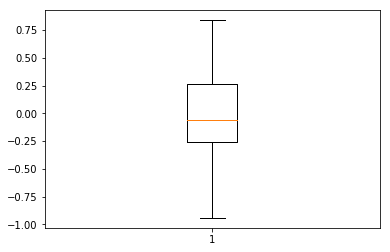

In [39]:
# Outlier treatment for PC1
plt.boxplot(df_pc.PC1)
Q1 = df_pc.PC1.quantile(0.25)
Q3 = df_pc.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pc = df_pc[(df_pc.PC1 >= Q1 - 1.5*IQR) & (df_pc.PC1 <= Q3 + 1.5*IQR)]
print(df_pc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 166
Data columns (total 14 columns):
PC1           162 non-null float64
PC2           162 non-null float64
PC3           162 non-null float64
PC4           162 non-null float64
country       162 non-null object
child_mort    162 non-null float64
exports       162 non-null float64
health        162 non-null float64
imports       162 non-null float64
income        162 non-null int64
inflation     162 non-null float64
life_expec    162 non-null float64
total_fer     162 non-null float64
gdpp          162 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 19.0+ KB
None


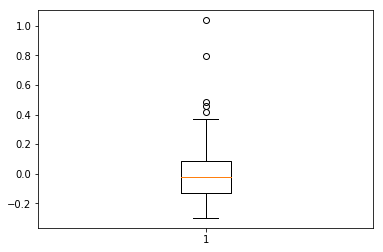

In [40]:
# outlier treatment for PC2
plt.boxplot(df_pc.PC2)
Q1 = df_pc.PC2.quantile(0.25)
Q3 = df_pc.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pc = df_pc[(df_pc.PC2 >= Q1 - 1.5*IQR) & (df_pc.PC2 <= Q3 + 1.5*IQR)]
print(df_pc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 166
Data columns (total 14 columns):
PC1           161 non-null float64
PC2           161 non-null float64
PC3           161 non-null float64
PC4           161 non-null float64
country       161 non-null object
child_mort    161 non-null float64
exports       161 non-null float64
health        161 non-null float64
imports       161 non-null float64
income        161 non-null int64
inflation     161 non-null float64
life_expec    161 non-null float64
total_fer     161 non-null float64
gdpp          161 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 18.9+ KB
None


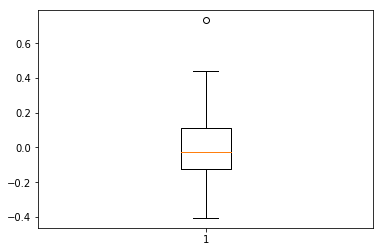

In [41]:
# outlier treatment for PC3
plt.boxplot(df_pc.PC3)
Q1 = df_pc.PC3.quantile(0.25)
Q3 = df_pc.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pc = df_pc[(df_pc.PC3 >= Q1 - 1.5*IQR) & (df_pc.PC3 <= Q3 + 1.5*IQR)]
print(df_pc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 166
Data columns (total 14 columns):
PC1           156 non-null float64
PC2           156 non-null float64
PC3           156 non-null float64
PC4           156 non-null float64
country       156 non-null object
child_mort    156 non-null float64
exports       156 non-null float64
health        156 non-null float64
imports       156 non-null float64
income        156 non-null int64
inflation     156 non-null float64
life_expec    156 non-null float64
total_fer     156 non-null float64
gdpp          156 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 18.3+ KB
None


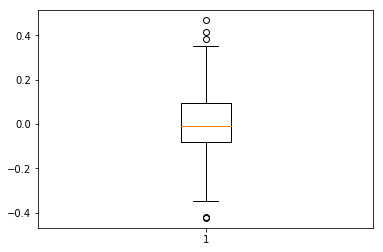

In [42]:
# outlier treatment for PC4

plt.boxplot(df_pc.PC4)
Q1 = df_pc.PC4.quantile(0.25)
Q3 = df_pc.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pc = df_pc[(df_pc.PC4 >= Q1 - 1.5*IQR) & (df_pc.PC4 <= Q3 + 1.5*IQR)]
print(df_pc.info())

#### We are left with 156 rows after outlier removal

In [43]:
#check Data frame
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 166
Data columns (total 14 columns):
PC1           156 non-null float64
PC2           156 non-null float64
PC3           156 non-null float64
PC4           156 non-null float64
country       156 non-null object
child_mort    156 non-null float64
exports       156 non-null float64
health        156 non-null float64
imports       156 non-null float64
income        156 non-null int64
inflation     156 non-null float64
life_expec    156 non-null float64
total_fer     156 non-null float64
gdpp          156 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 18.3+ KB


## Hopkins Statistics:

In [44]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
df_k = df_pc[['PC1','PC2','PC3', 'PC4']] #Subsetting the data

In [46]:
hopkins(df_k)

0.7477279254132198

#### As the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

### Starting K - Means Analysis by some Random Value
##### Taking K=5

In [47]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Silhouette Analysis
#### We perform silhoutte Analysis to check for the optimum value of K

In [48]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_k)
    sse_.append([k, silhouette_score(df_k, kmeans.labels_)])

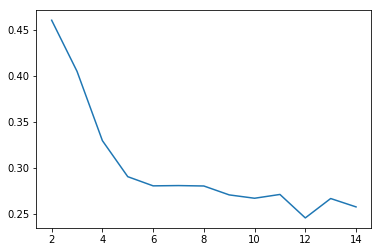

In [49]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Silhoutte plot suggest optimum value of K  between 4 and 6

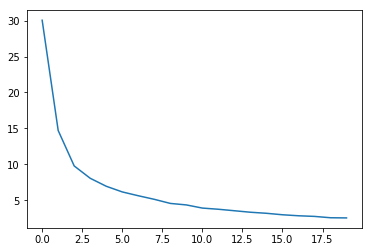

In [50]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_k)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

##### Based upon Sum of Squared Distance graph Optimum K should be between 2 and 5.

##### Lets take K= 4 at first and make the cluster 

In [51]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
## Create a subset of a df_pc data frame with country and PC variable :-

df_pc2= df_pc[['country','PC1','PC2','PC3','PC4']]

In [53]:
#Check the dateframe
df_pc2

,country,PC1,PC2,PC3,PC4
0,Afghanistan,0.598986,0.095540,0.157659,0.023049
1,Albania,-0.158432,-0.212781,-0.063284,0.060389
2,Algeria,-0.003812,-0.135260,-0.133676,-0.134469
3,Angola,0.650130,0.276708,-0.143587,-0.154404
4,Antigua and Barbuda,-0.200758,-0.065625,-0.099946,0.036499
5,Argentina,-0.112642,-0.204061,0.119142,-0.106585
6,Armenia,-0.087379,-0.244904,-0.153060,-0.012485
7,Australia,-0.440672,0.017764,0.268551,-0.227395
8,Austria,-0.520449,0.115801,0.242977,-0.001728
9,Azerbaijan,-0.038662,-0.121110,-0.079525,-0.061486


In [54]:
## Lets create the cluster data frame with Country , PC Variable and Cluster ID:-

df_km = pd.concat([df_pc, pd.Series(model_clus4.labels_)], axis=1)

In [55]:
df_km

,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,0.598986,0.095540,0.157659,0.023049,Afghanistan,90.2,10.000,7.58,44.9000,1610.0,9.440,56.2,5.82,553.0,2.0
1,-0.158432,-0.212781,-0.063284,0.060389,Albania,16.6,28.000,6.55,48.6000,9930.0,4.490,76.3,1.65,4090.0,3.0
2,-0.003812,-0.135260,-0.133676,-0.134469,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.100,76.5,2.89,4460.0,3.0
3,0.650130,0.276708,-0.143587,-0.154404,Angola,119.0,62.300,2.85,42.9000,5900.0,22.400,60.1,6.16,3530.0,2.0
4,-0.200758,-0.065625,-0.099946,0.036499,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100.0,1.440,76.8,2.13,12200.0,3.0
5,-0.112642,-0.204061,0.119142,-0.106585,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.900,75.8,2.37,10300.0,3.0
6,-0.087379,-0.244904,-0.153060,-0.012485,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.770,73.3,1.69,3220.0,3.0
7,-0.440672,0.017764,0.268551,-0.227395,Australia,4.8,19.800,8.73,20.9000,41400.0,1.160,82.0,1.93,51900.0,1.0
8,-0.520449,0.115801,0.242977,-0.001728,Austria,4.3,51.300,11.00,47.8000,43200.0,0.873,80.5,1.44,46900.0,1.0
9,-0.038662,-0.121110,-0.079525,-0.061486,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.800,69.1,1.92,5840.0,3.0


In [56]:
# Assigning column names to data frame 
df_km.columns = [ 'PC1', 'PC2', 'PC3', 'PC4' ,'country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [57]:
df_km

,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,0.598986,0.095540,0.157659,0.023049,Afghanistan,90.2,10.000,7.58,44.9000,1610.0,9.440,56.2,5.82,553.0,2.0
1,-0.158432,-0.212781,-0.063284,0.060389,Albania,16.6,28.000,6.55,48.6000,9930.0,4.490,76.3,1.65,4090.0,3.0
2,-0.003812,-0.135260,-0.133676,-0.134469,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.100,76.5,2.89,4460.0,3.0
3,0.650130,0.276708,-0.143587,-0.154404,Angola,119.0,62.300,2.85,42.9000,5900.0,22.400,60.1,6.16,3530.0,2.0
4,-0.200758,-0.065625,-0.099946,0.036499,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100.0,1.440,76.8,2.13,12200.0,3.0
5,-0.112642,-0.204061,0.119142,-0.106585,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.900,75.8,2.37,10300.0,3.0
6,-0.087379,-0.244904,-0.153060,-0.012485,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.770,73.3,1.69,3220.0,3.0
7,-0.440672,0.017764,0.268551,-0.227395,Australia,4.8,19.800,8.73,20.9000,41400.0,1.160,82.0,1.93,51900.0,1.0
8,-0.520449,0.115801,0.242977,-0.001728,Austria,4.3,51.300,11.00,47.8000,43200.0,0.873,80.5,1.44,46900.0,1.0
9,-0.038662,-0.121110,-0.079525,-0.061486,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.800,69.1,1.92,5840.0,3.0


In [58]:
# Calculating Means of different varibles for each ClusterID

km_clusters_child_mort = 	pd.DataFrame(df_km.groupby(['ClusterID']).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_km.groupby(['ClusterID']).exports.mean())
km_clusters_imports = 	pd.DataFrame(df_km.groupby(['ClusterID']).imports.mean())
km_clusters_health = 	pd.DataFrame(df_km.groupby(['ClusterID']).health.mean())
km_clusters_income = 	pd.DataFrame(df_km.groupby(['ClusterID']).income.mean())
km_clusters_inflation = 	pd.DataFrame(df_km.groupby(['ClusterID']).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(df_km.groupby(['ClusterID']).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_km.groupby(['ClusterID']).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(df_km.groupby(['ClusterID']).gdpp.mean())
km_clusters_PC1 = 	pd.DataFrame(df_km.groupby(['ClusterID']).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(df_km.groupby(['ClusterID']).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(df_km.groupby(['ClusterID']).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(df_km.groupby(['ClusterID']).PC4.mean())



In [59]:
#Getting the Mean dataframe for all 4 clusters
df_2 = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
df_2.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1","PC2", "PC3","PC4" ]
df_2.head(20)

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1,PC2,PC3,PC4
0,0,45.955263,36.460789,7.038158,48.863158,10223.868421,6.751711,68.581579,3.448421,7477.500000,0.114375,-0.008435,0.014595,0.038899
1,1,33.759091,46.413636,7.464091,48.722727,22994.454545,5.585818,71.209091,2.628636,21307.409091,-0.098530,0.048790,0.035755,0.002014
2,2,51.844000,31.796000,6.634400,42.080000,11312.720000,5.735720,67.844000,3.388800,8832.080000,0.131492,-0.019364,0.021817,-0.004159
3,3,32.896721,37.932607,6.400164,41.760097,15830.655738,8.887967,72.300000,2.715574,11354.819672,-0.029960,-0.057304,-0.019744,-0.025810


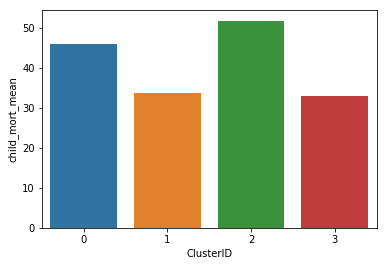

In [60]:
# Barplot for child mortality mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.child_mort_mean)

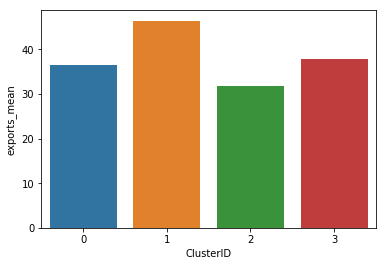

In [61]:
# Barplot for exports mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.exports_mean)

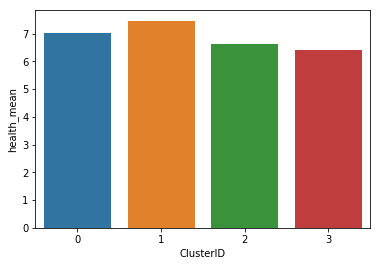

In [62]:
# Barplot for health mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.health_mean)

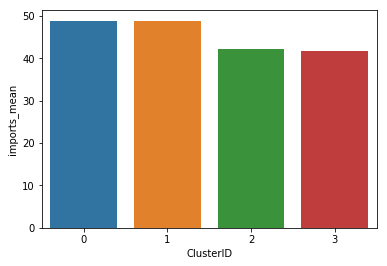

In [63]:
# Barplot for imports mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.imports_mean)

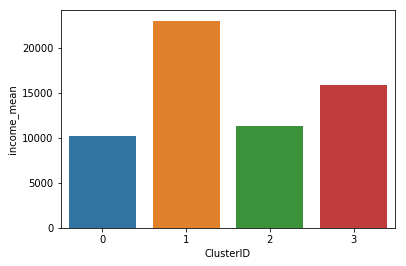

In [64]:
# Barplot for income mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.income_mean)

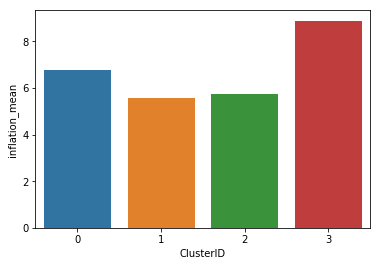

In [65]:
# Barplot for inflation mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.inflation_mean)

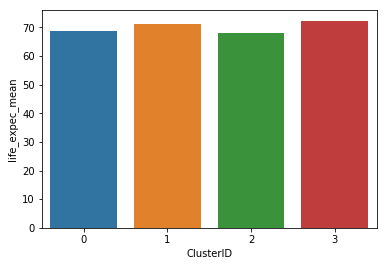

In [66]:
# Barplot for life expec mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.life_expec_mean)

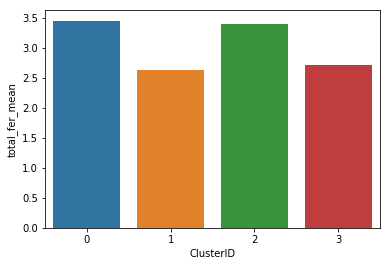

In [67]:
# Barplot for total fertility mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.total_fer_mean)

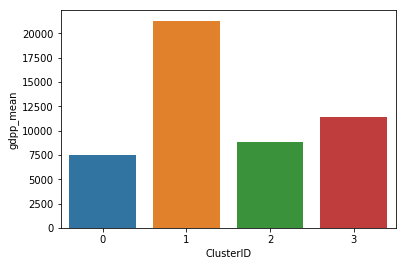

In [68]:
# Barplot for gdpp mean for different clusters
sns.barplot(x=df_2.ClusterID, y=df_2.gdpp_mean)

#### Based on the Barplot we can see that gdpp, income, child mortality and export are deciding and significant features to judge the countries that are in the direst need of aid

#### Also we can see based on above parameters and barplot that countries in cluster 2 and cluster 1 are in more need of aid

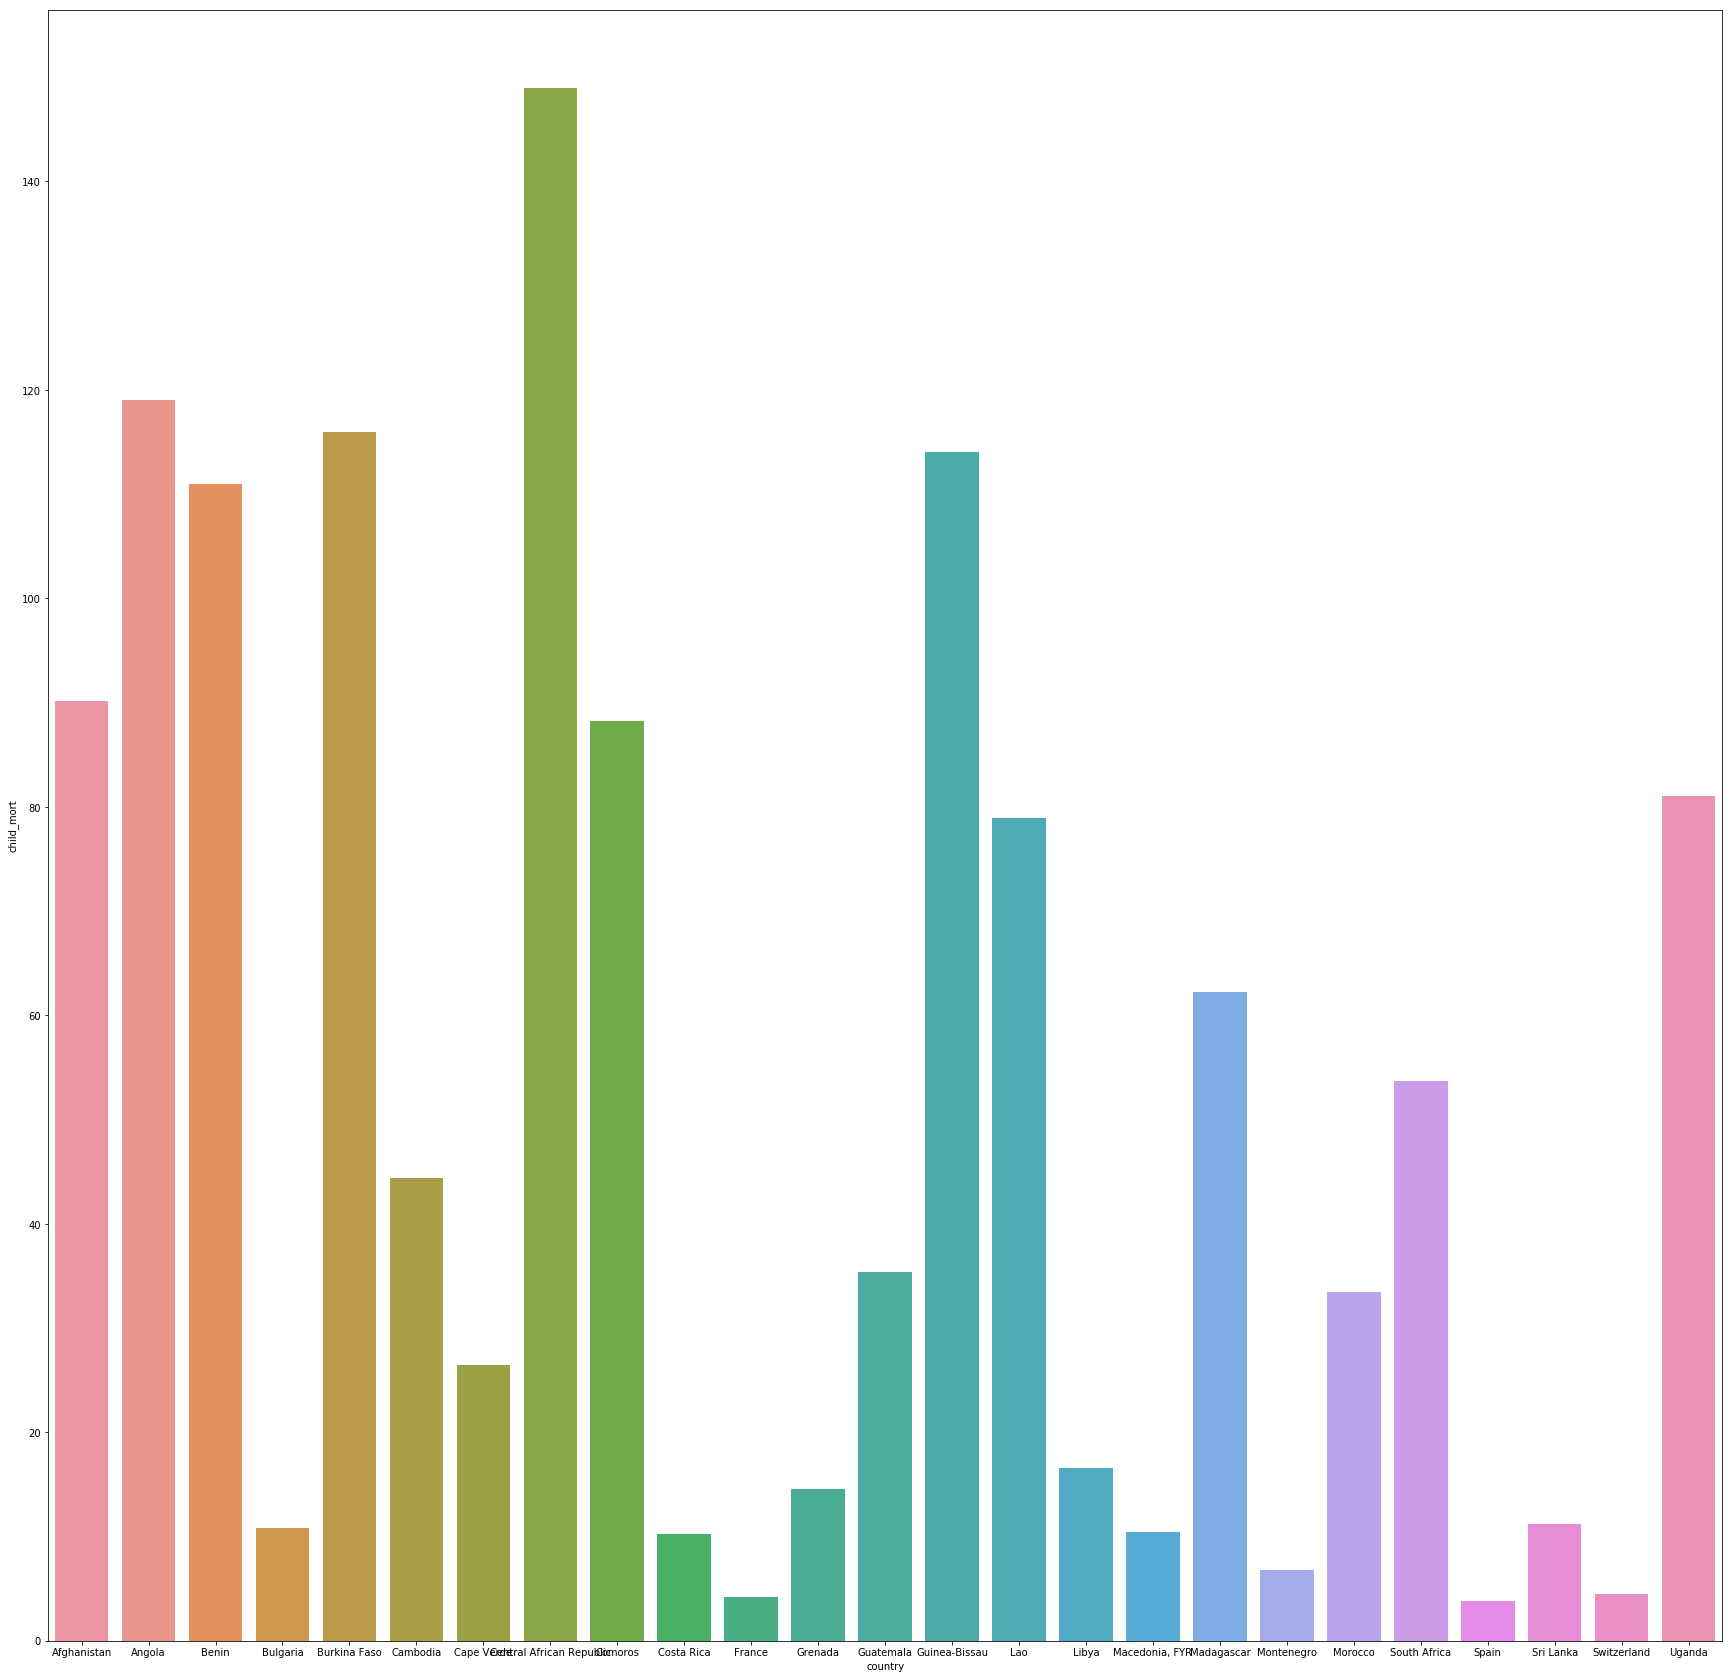

In [69]:
# Plotting countries of Cluster 2 for child mortality
df_km1=df_km[['country','child_mort']][df_km.ClusterID==2]
plt.figure(figsize=(30,30))   
sns.barplot(x=df_km1.country, y=df_km1.child_mort)

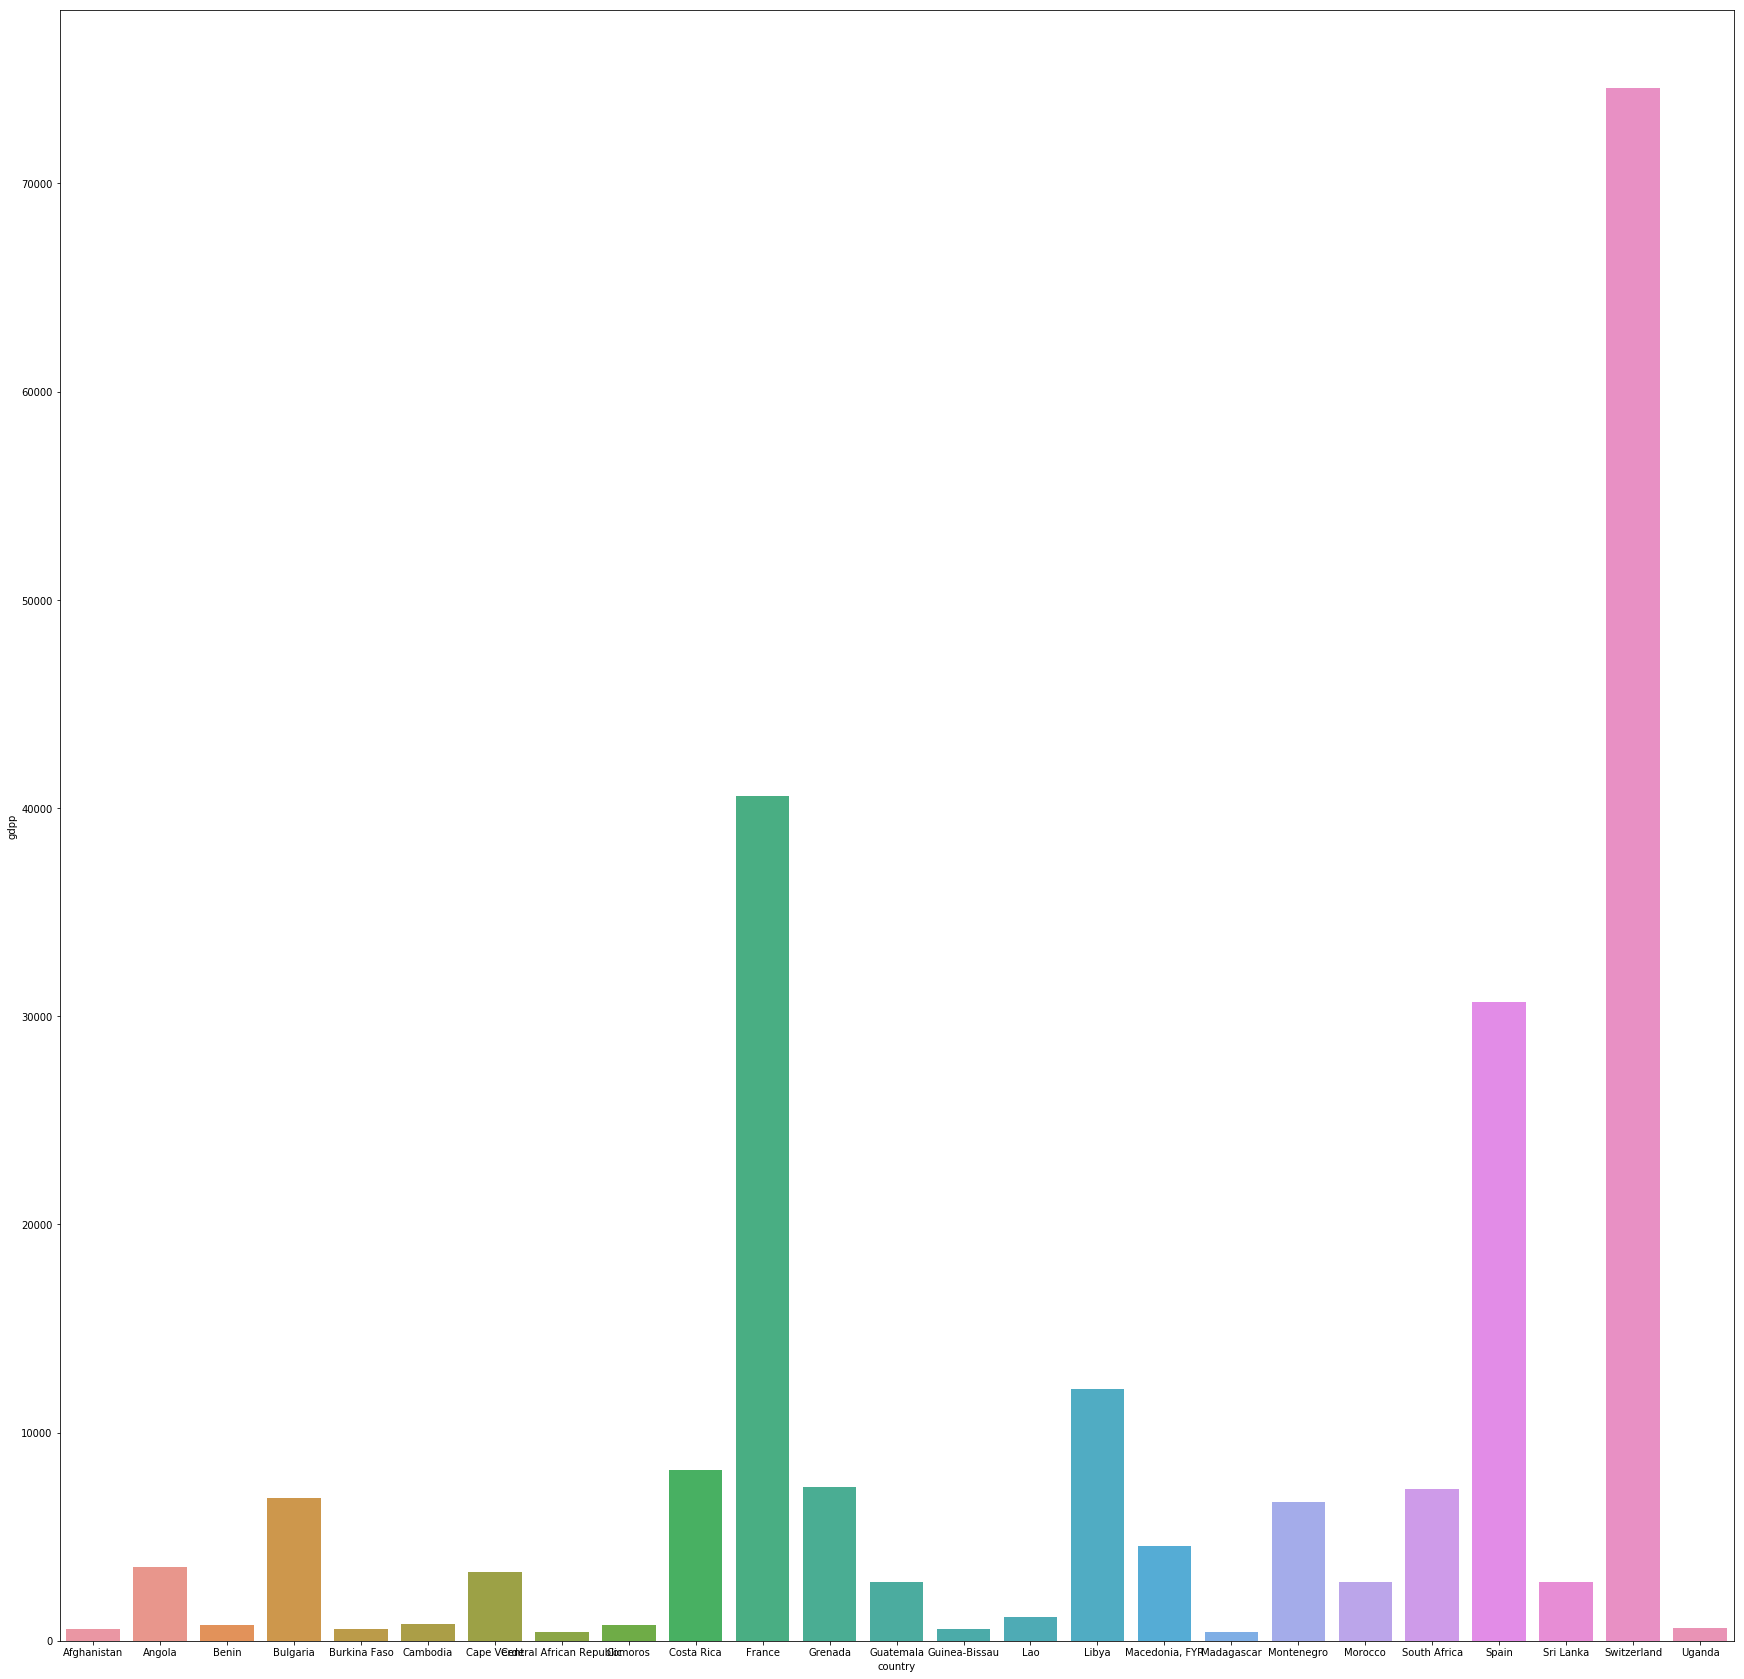

In [70]:
# Plotting countries of Cluster 2 for gdpp
df_km1=df_km[['country','gdpp']][df_km.ClusterID==2]
plt.figure(figsize=(30,30))   
sns.barplot(x=df_km1.country, y=df_km1.gdpp)

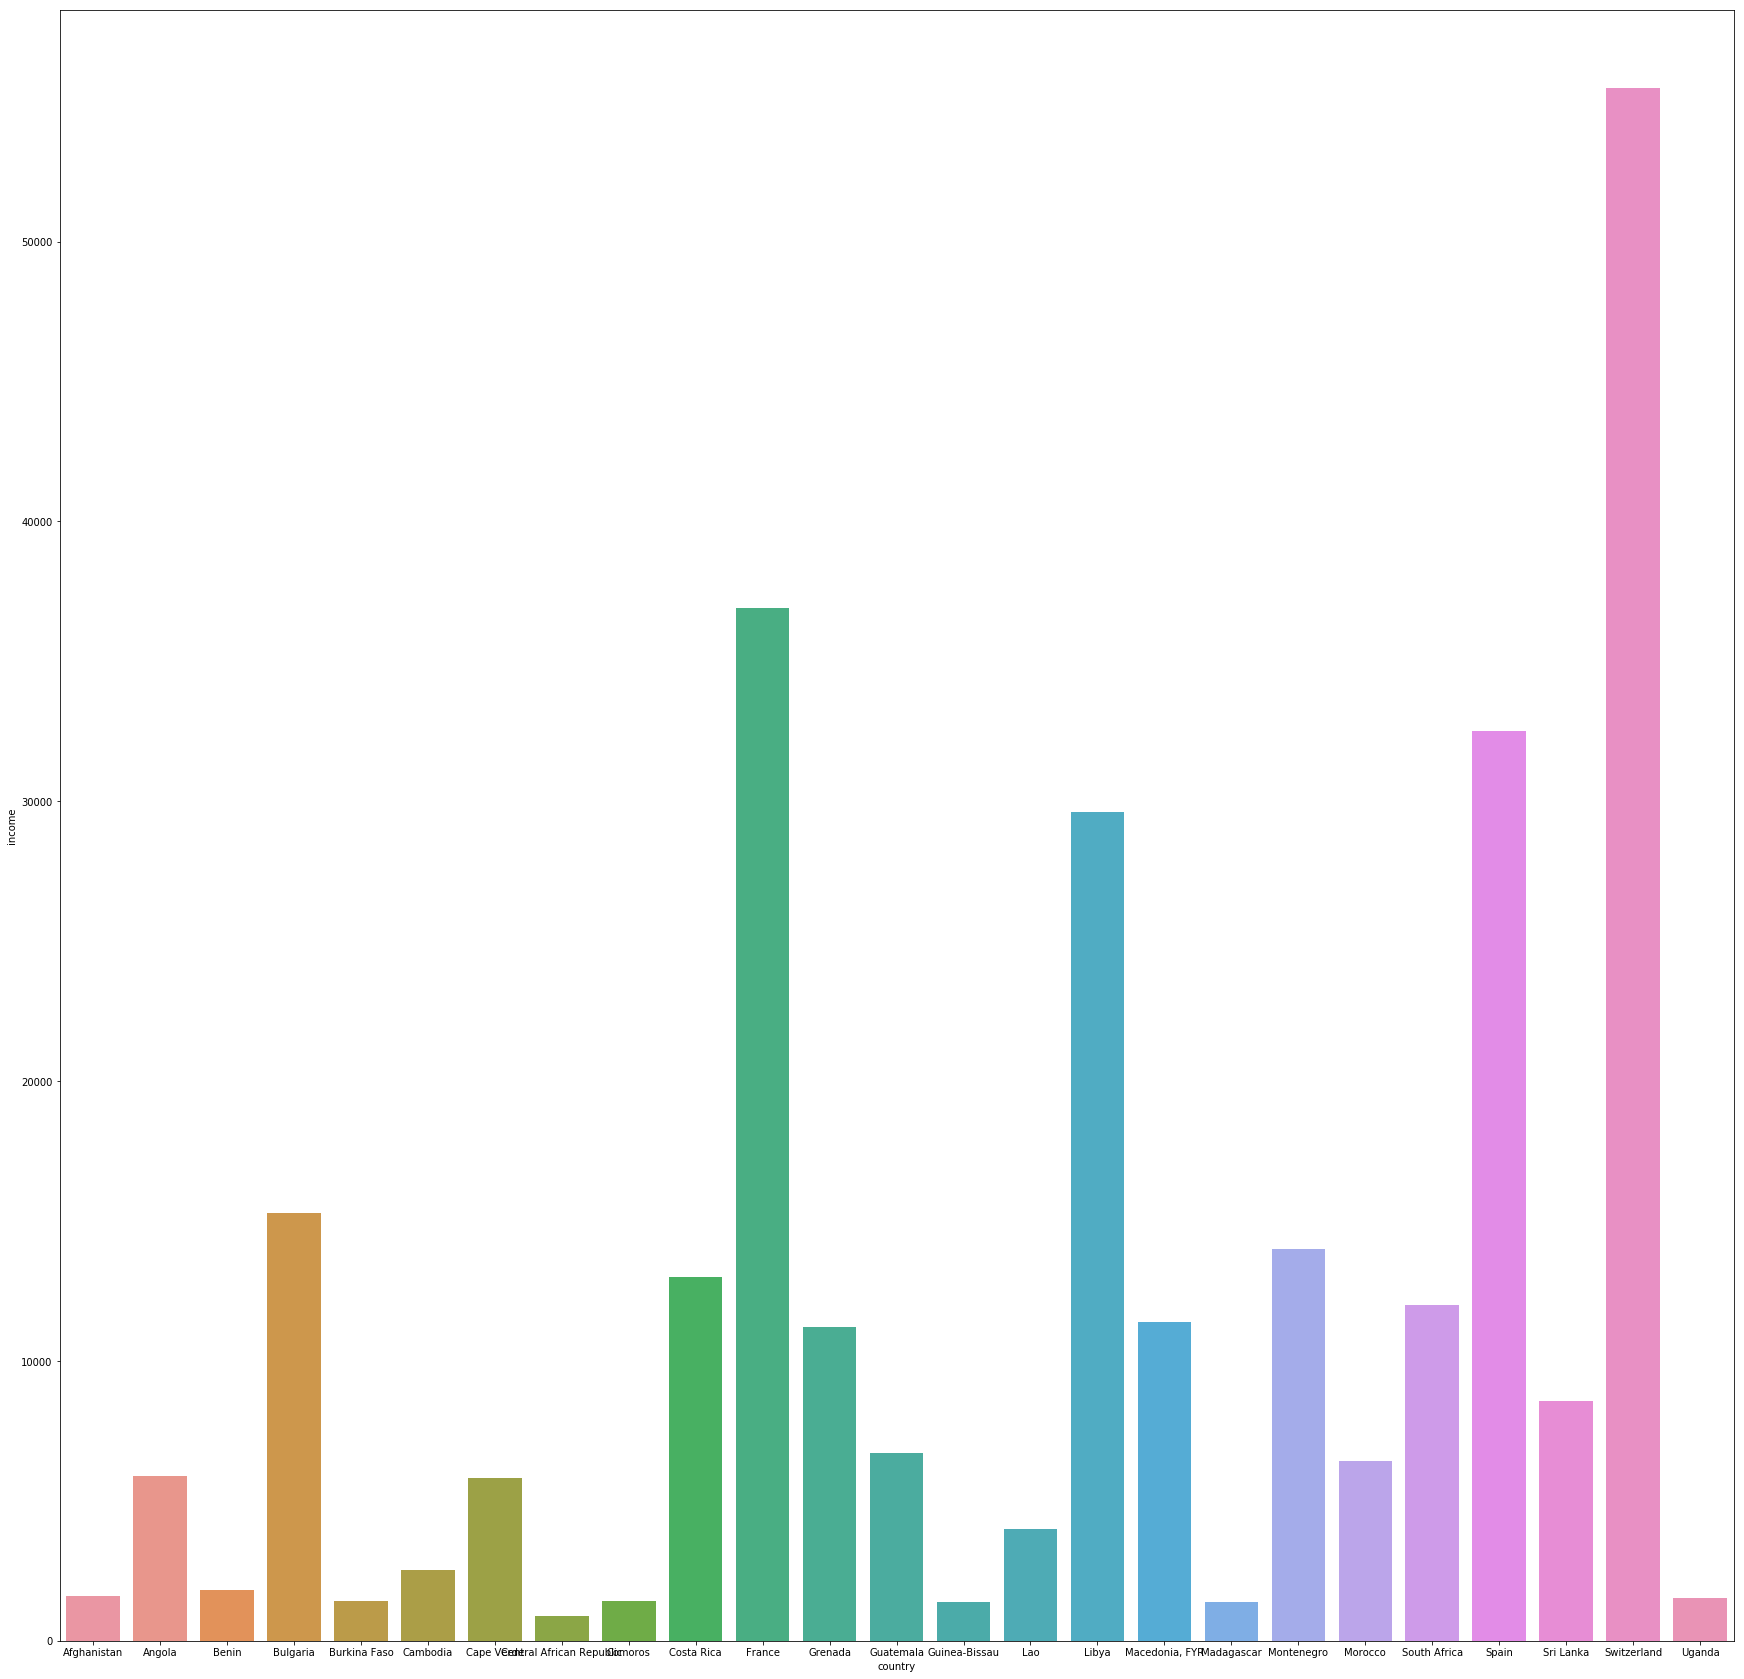

In [71]:
# Plotting countries of Cluster 2 for income
df_km1=df_km[['country','income']][df_km.ClusterID==2]
plt.figure(figsize=(30,30))   
sns.barplot(x=df_km1.country, y=df_km1.income)

#### We can see that even countries like France, Spain and Switzerland, Libya having high income, high GDP , low Child Mortality are coming to be part of cluster 2, which doesnot look good

#### We found that when K=4 we are getting some exception in clusters.
#### Lets try K=5 and find out if we get more relevant group of countries

In [72]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
## Lets create the cluster data frame with Country , PC Variable and Cluster ID:-

df_km5 = pd.concat([df_pc, pd.Series(model_clus5.labels_)], axis=1)

In [74]:
df_km5

,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,0.598986,0.095540,0.157659,0.023049,Afghanistan,90.2,10.000,7.58,44.9000,1610.0,9.440,56.2,5.82,553.0,1.0
1,-0.158432,-0.212781,-0.063284,0.060389,Albania,16.6,28.000,6.55,48.6000,9930.0,4.490,76.3,1.65,4090.0,4.0
2,-0.003812,-0.135260,-0.133676,-0.134469,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.100,76.5,2.89,4460.0,0.0
3,0.650130,0.276708,-0.143587,-0.154404,Angola,119.0,62.300,2.85,42.9000,5900.0,22.400,60.1,6.16,3530.0,1.0
4,-0.200758,-0.065625,-0.099946,0.036499,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100.0,1.440,76.8,2.13,12200.0,4.0
5,-0.112642,-0.204061,0.119142,-0.106585,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.900,75.8,2.37,10300.0,0.0
6,-0.087379,-0.244904,-0.153060,-0.012485,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.770,73.3,1.69,3220.0,0.0
7,-0.440672,0.017764,0.268551,-0.227395,Australia,4.8,19.800,8.73,20.9000,41400.0,1.160,82.0,1.93,51900.0,3.0
8,-0.520449,0.115801,0.242977,-0.001728,Austria,4.3,51.300,11.00,47.8000,43200.0,0.873,80.5,1.44,46900.0,3.0
9,-0.038662,-0.121110,-0.079525,-0.061486,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.800,69.1,1.92,5840.0,0.0


In [75]:
# Assigning column names to data frame 
df_km5.columns = [ 'PC1', 'PC2', 'PC3', 'PC4' ,'country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [76]:
# Calculating Means of different varibles for each ClusterID

km_cluster5_child_mort = 	pd.DataFrame(df_km5.groupby(['ClusterID']).child_mort.mean())
km_cluster5_exports = 	pd.DataFrame(df_km5.groupby(['ClusterID']).exports.mean())
km_cluster5_imports = 	pd.DataFrame(df_km5.groupby(['ClusterID']).imports.mean())
km_cluster5_health = 	pd.DataFrame(df_km5.groupby(['ClusterID']).health.mean())
km_cluster5_income = 	pd.DataFrame(df_km5.groupby(['ClusterID']).income.mean())
km_cluster5_inflation = 	pd.DataFrame(df_km5.groupby(['ClusterID']).inflation.mean())
km_cluster5_life_expec = 	pd.DataFrame(df_km5.groupby(['ClusterID']).life_expec.mean())
km_cluster5_total_fer = 	pd.DataFrame(df_km5.groupby(['ClusterID']).total_fer.mean())
km_cluster5_gdpp = 	pd.DataFrame(df_km5.groupby(['ClusterID']).gdpp.mean())


In [77]:
#Getting the Mean dataframe for all 5 clusters
df_5 = pd.concat([pd.Series([0,1,2,3,4]), km_cluster5_child_mort, km_cluster5_exports, km_cluster5_health,km_cluster5_imports,km_cluster5_income,km_cluster5_inflation,km_cluster5_life_expec,km_cluster5_total_fer,km_cluster5_gdpp], axis=1)
df_5.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean" ]
df_5.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,33.688095,36.423786,6.412143,39.415855,15576.285714,7.305690,72.940476,2.791190,12151.952381
1,1,51.412500,32.079167,6.753750,42.041667,11726.166667,5.608458,68.137500,3.338333,9182.875000
2,2,46.467857,34.404286,7.267857,49.960714,9108.321429,6.856857,67.478571,3.515000,6559.714286
3,3,34.890476,47.233333,7.577619,50.038095,22989.428571,5.175619,71.304762,2.679048,21812.523810
4,4,35.780645,40.660645,6.254839,45.609677,15142.903226,10.415806,70.758065,2.813226,9478.967742


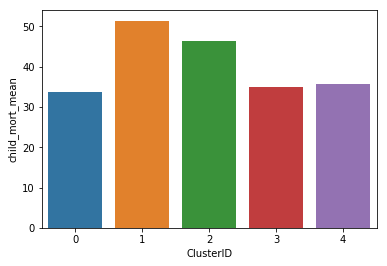

In [78]:
# Barplot for child mortality mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.child_mort_mean)

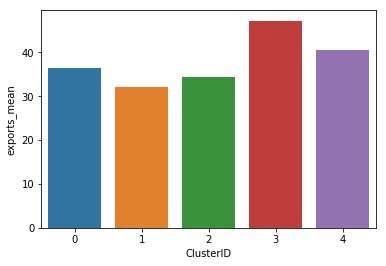

In [79]:
# Barplot for exports mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.exports_mean)

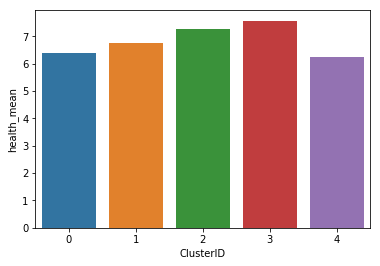

In [80]:
# Barplot for health mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.health_mean)

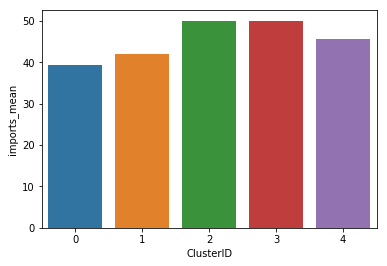

In [81]:
# Barplot for imports mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.imports_mean)

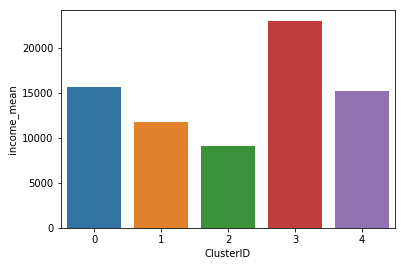

In [82]:
# Barplot for income mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.income_mean)

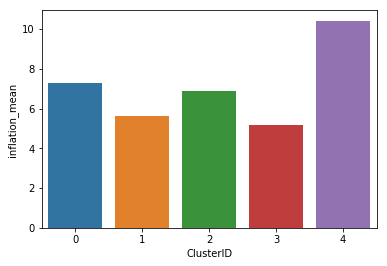

In [83]:
# Barplot for inflation mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.inflation_mean)

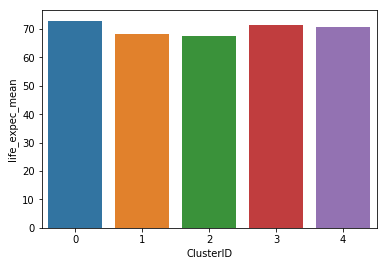

In [84]:
# Barplot for life expec mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.life_expec_mean)

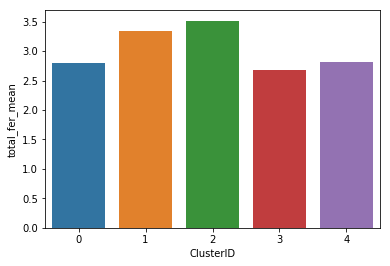

In [85]:
# Barplot for total fertility mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.total_fer_mean)

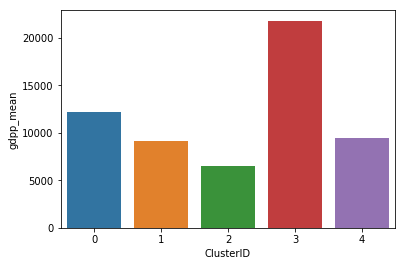

In [86]:
# Barplot for gdpp mean for different clusters
sns.barplot(x=df_5.ClusterID, y=df_5.gdpp_mean)

#### Based on the Barplot we can see that gdpp, income, child mortality and export are deciding and significant features to judge the countries that are in the direst need of aid

#### Also we can see based on above parameters and barplot that countries in cluster 2 is in more need of aid

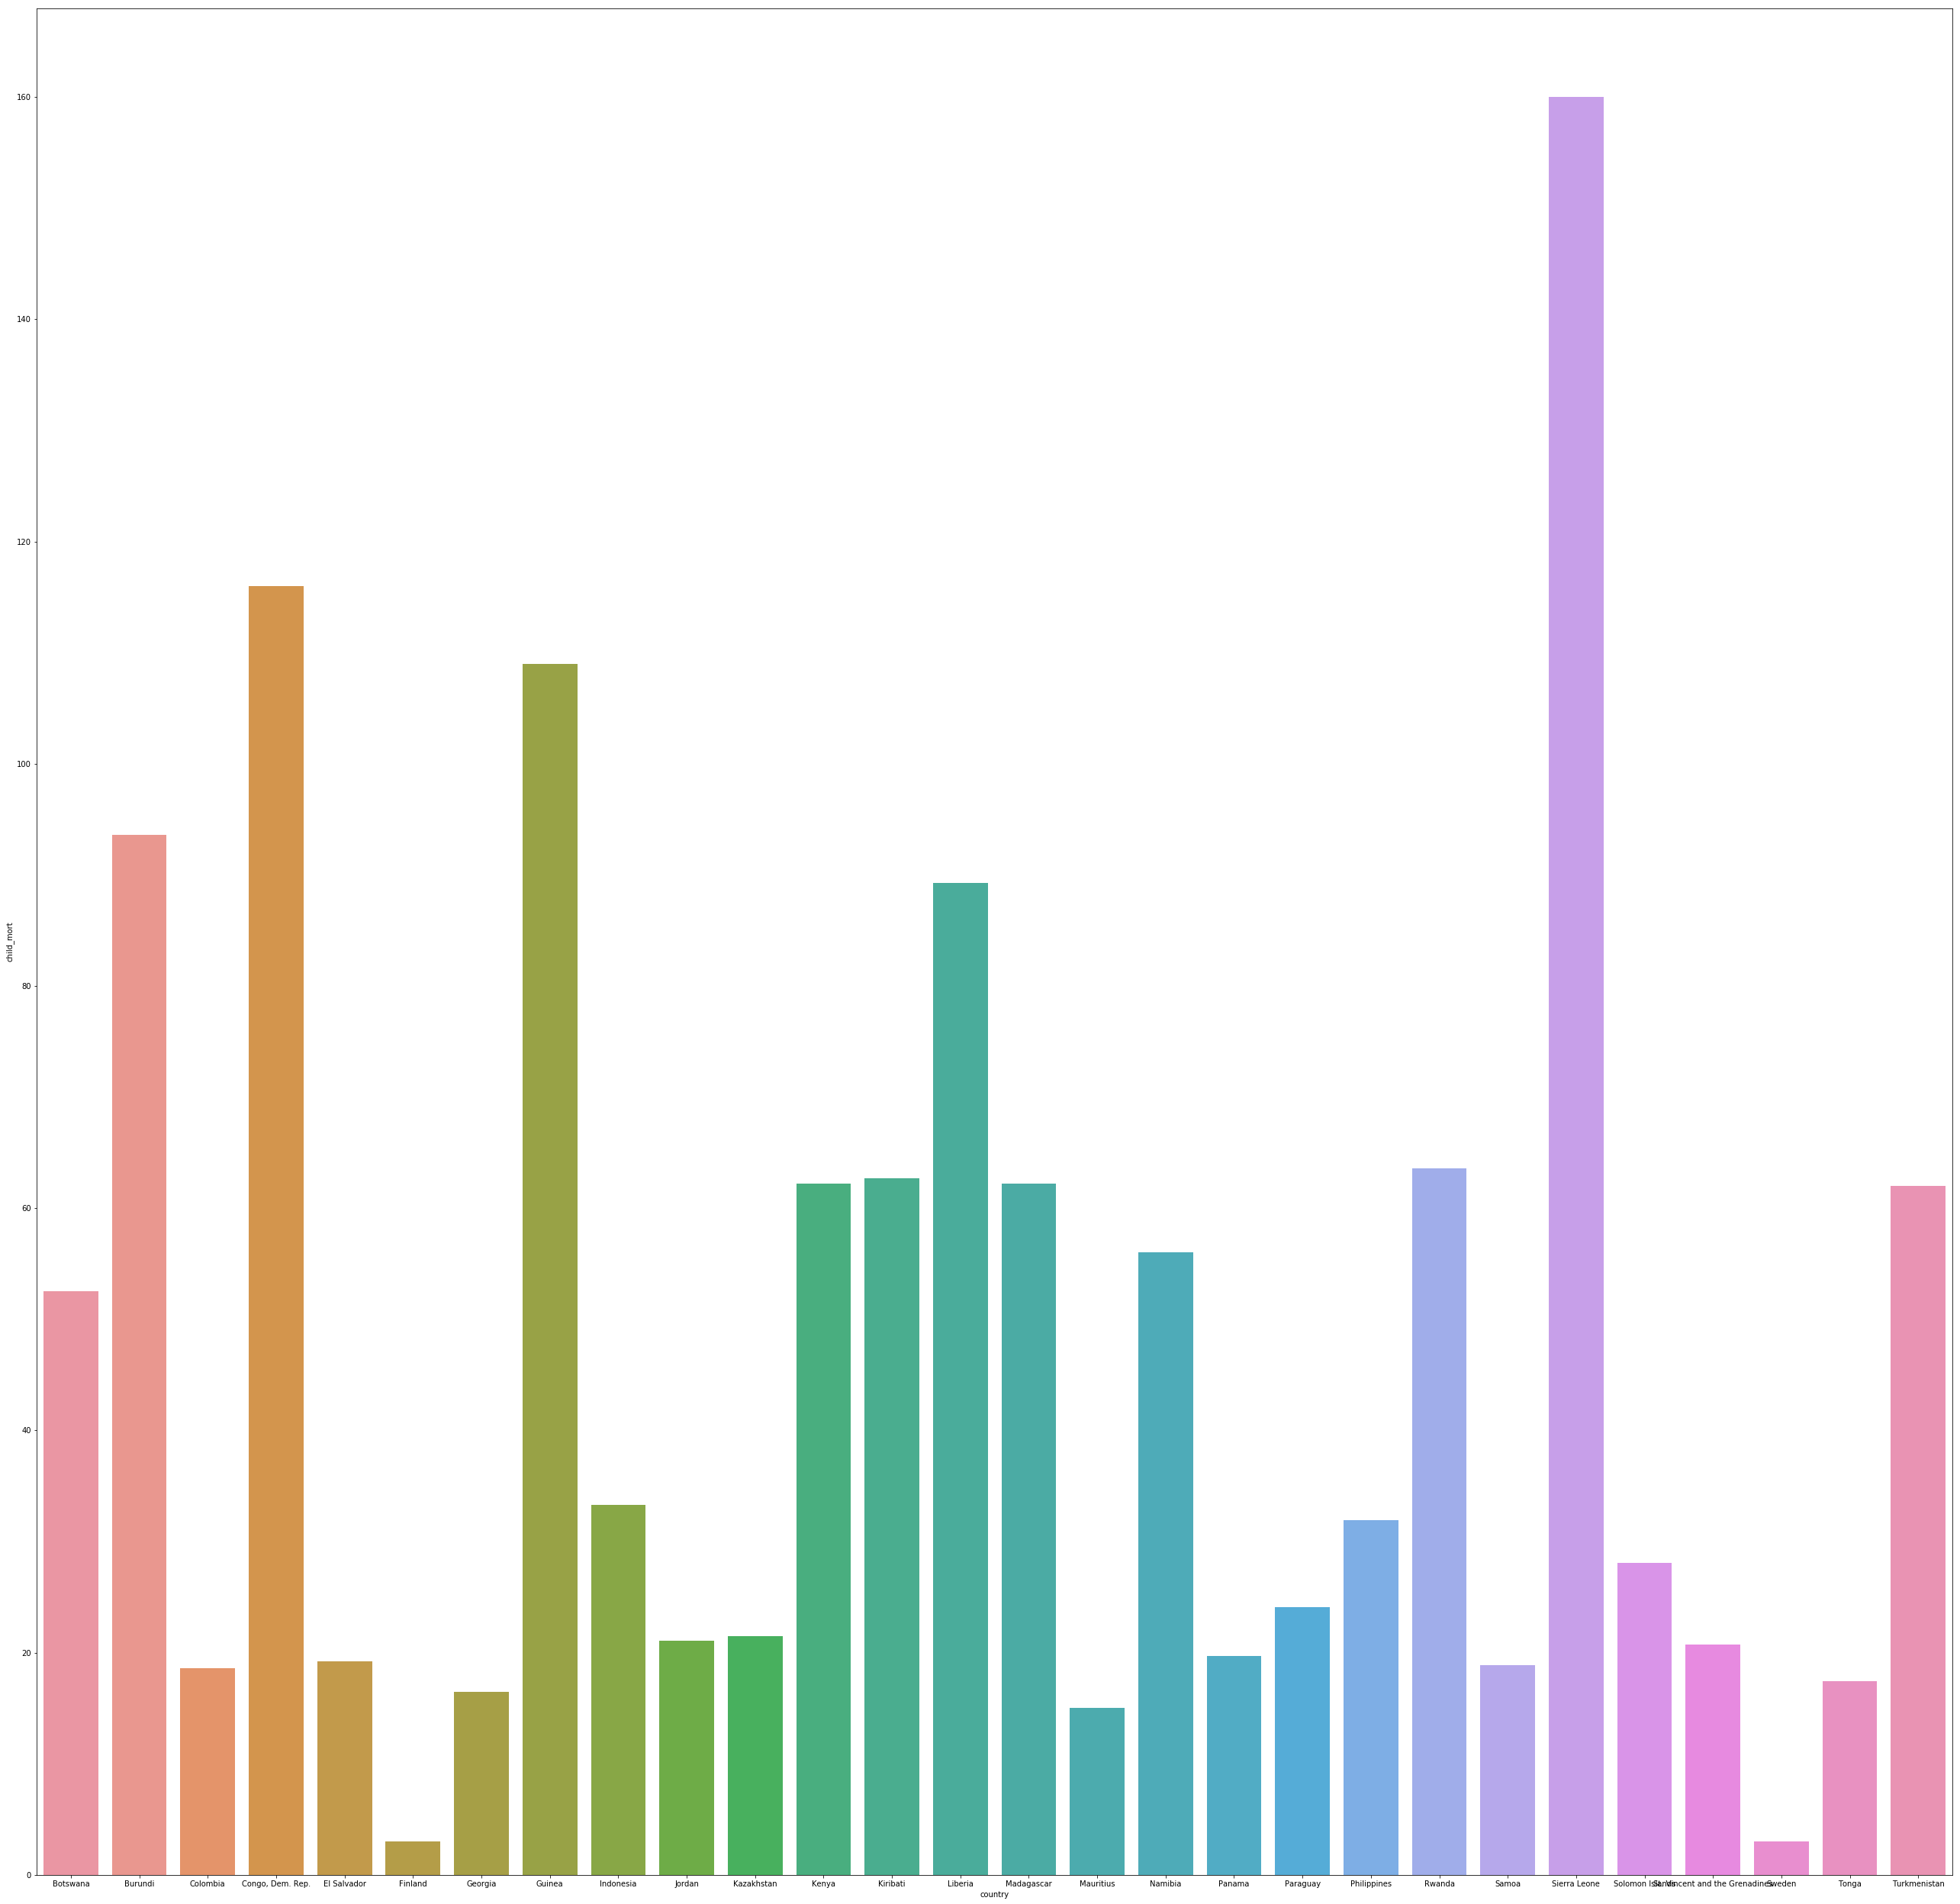

In [113]:
# Plotting countries of Cluster 2 for child mortality
df_km6=df_km5[['country','child_mort']][df_km5.ClusterID==2]
plt.figure(figsize=(45,45))   
sns.barplot(x=df_km6.country, y=df_km6.child_mort)

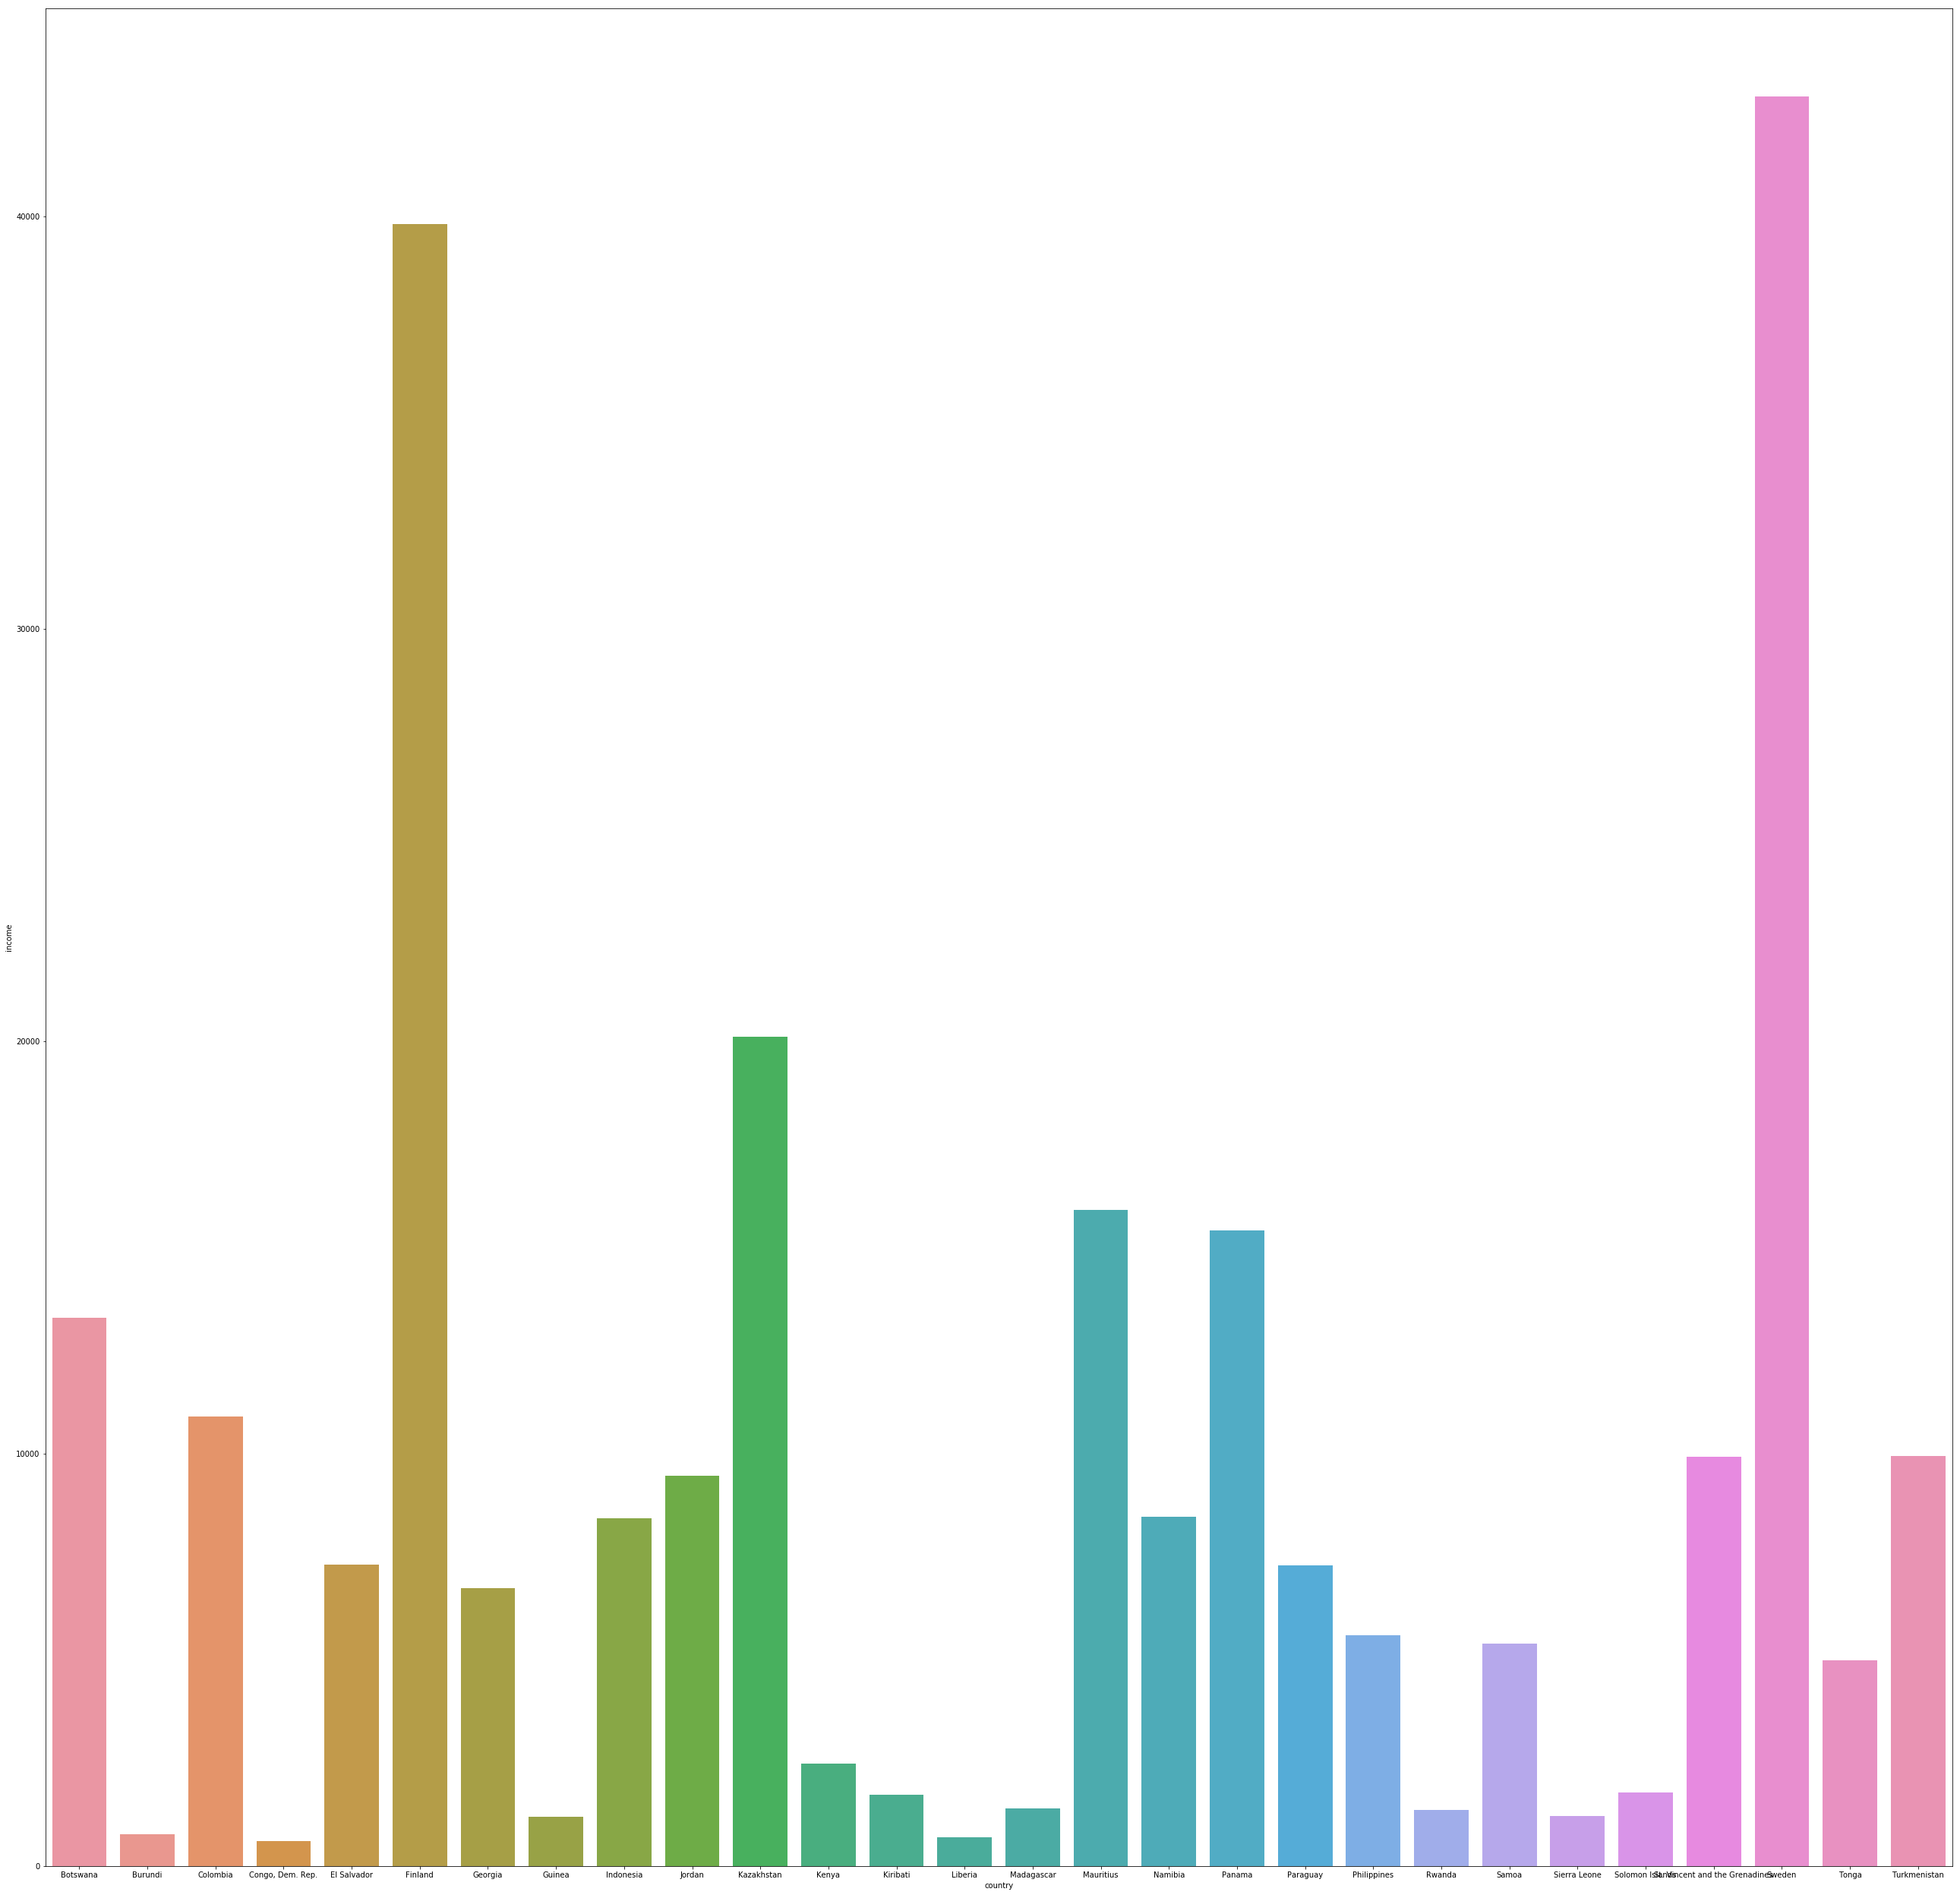

In [114]:
# Plotting countries of Cluster 0 for income
df_km6=df_km5[['country','income']][df_km5.ClusterID==2]
plt.figure(figsize=(45,45))   
sns.barplot(x=df_km6.country, y=df_km6.income)

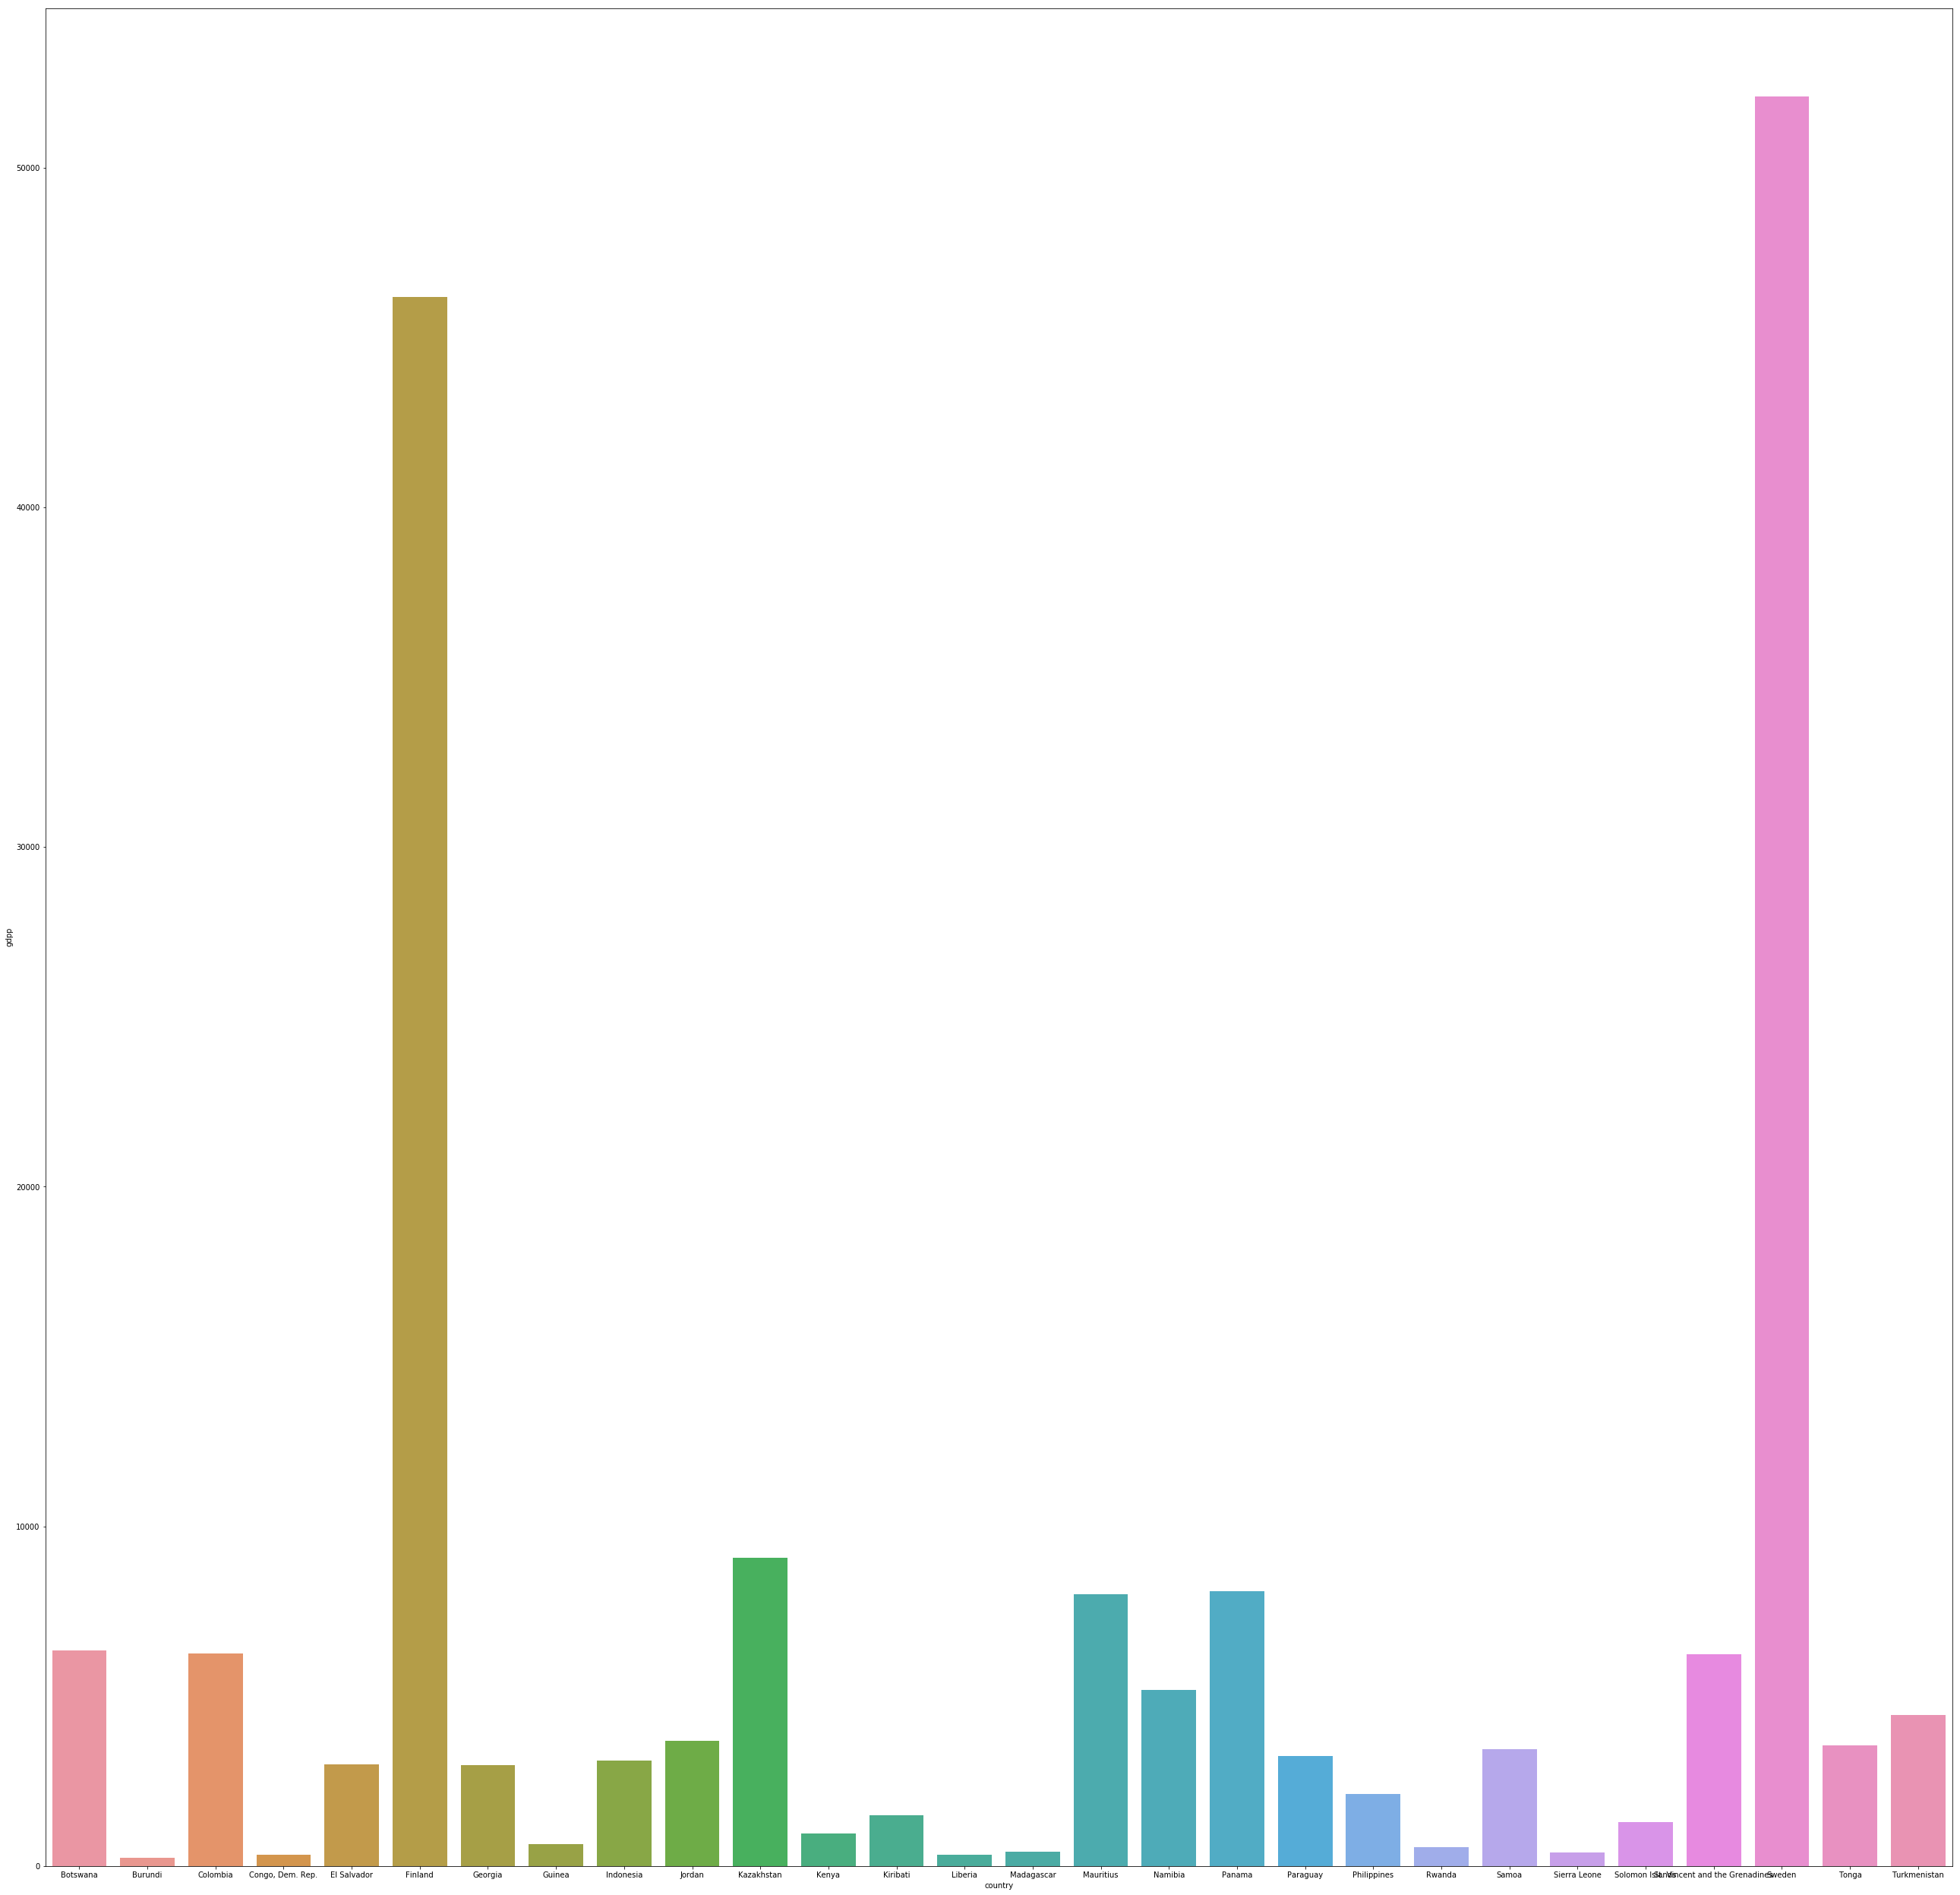

In [115]:
# Plotting countries of Cluster 0 for gdpp
df_km6=df_km5[['country','gdpp']][df_km5.ClusterID==2]
plt.figure(figsize=(45,45))   
sns.barplot(x=df_km6.country, y=df_km6.gdpp)

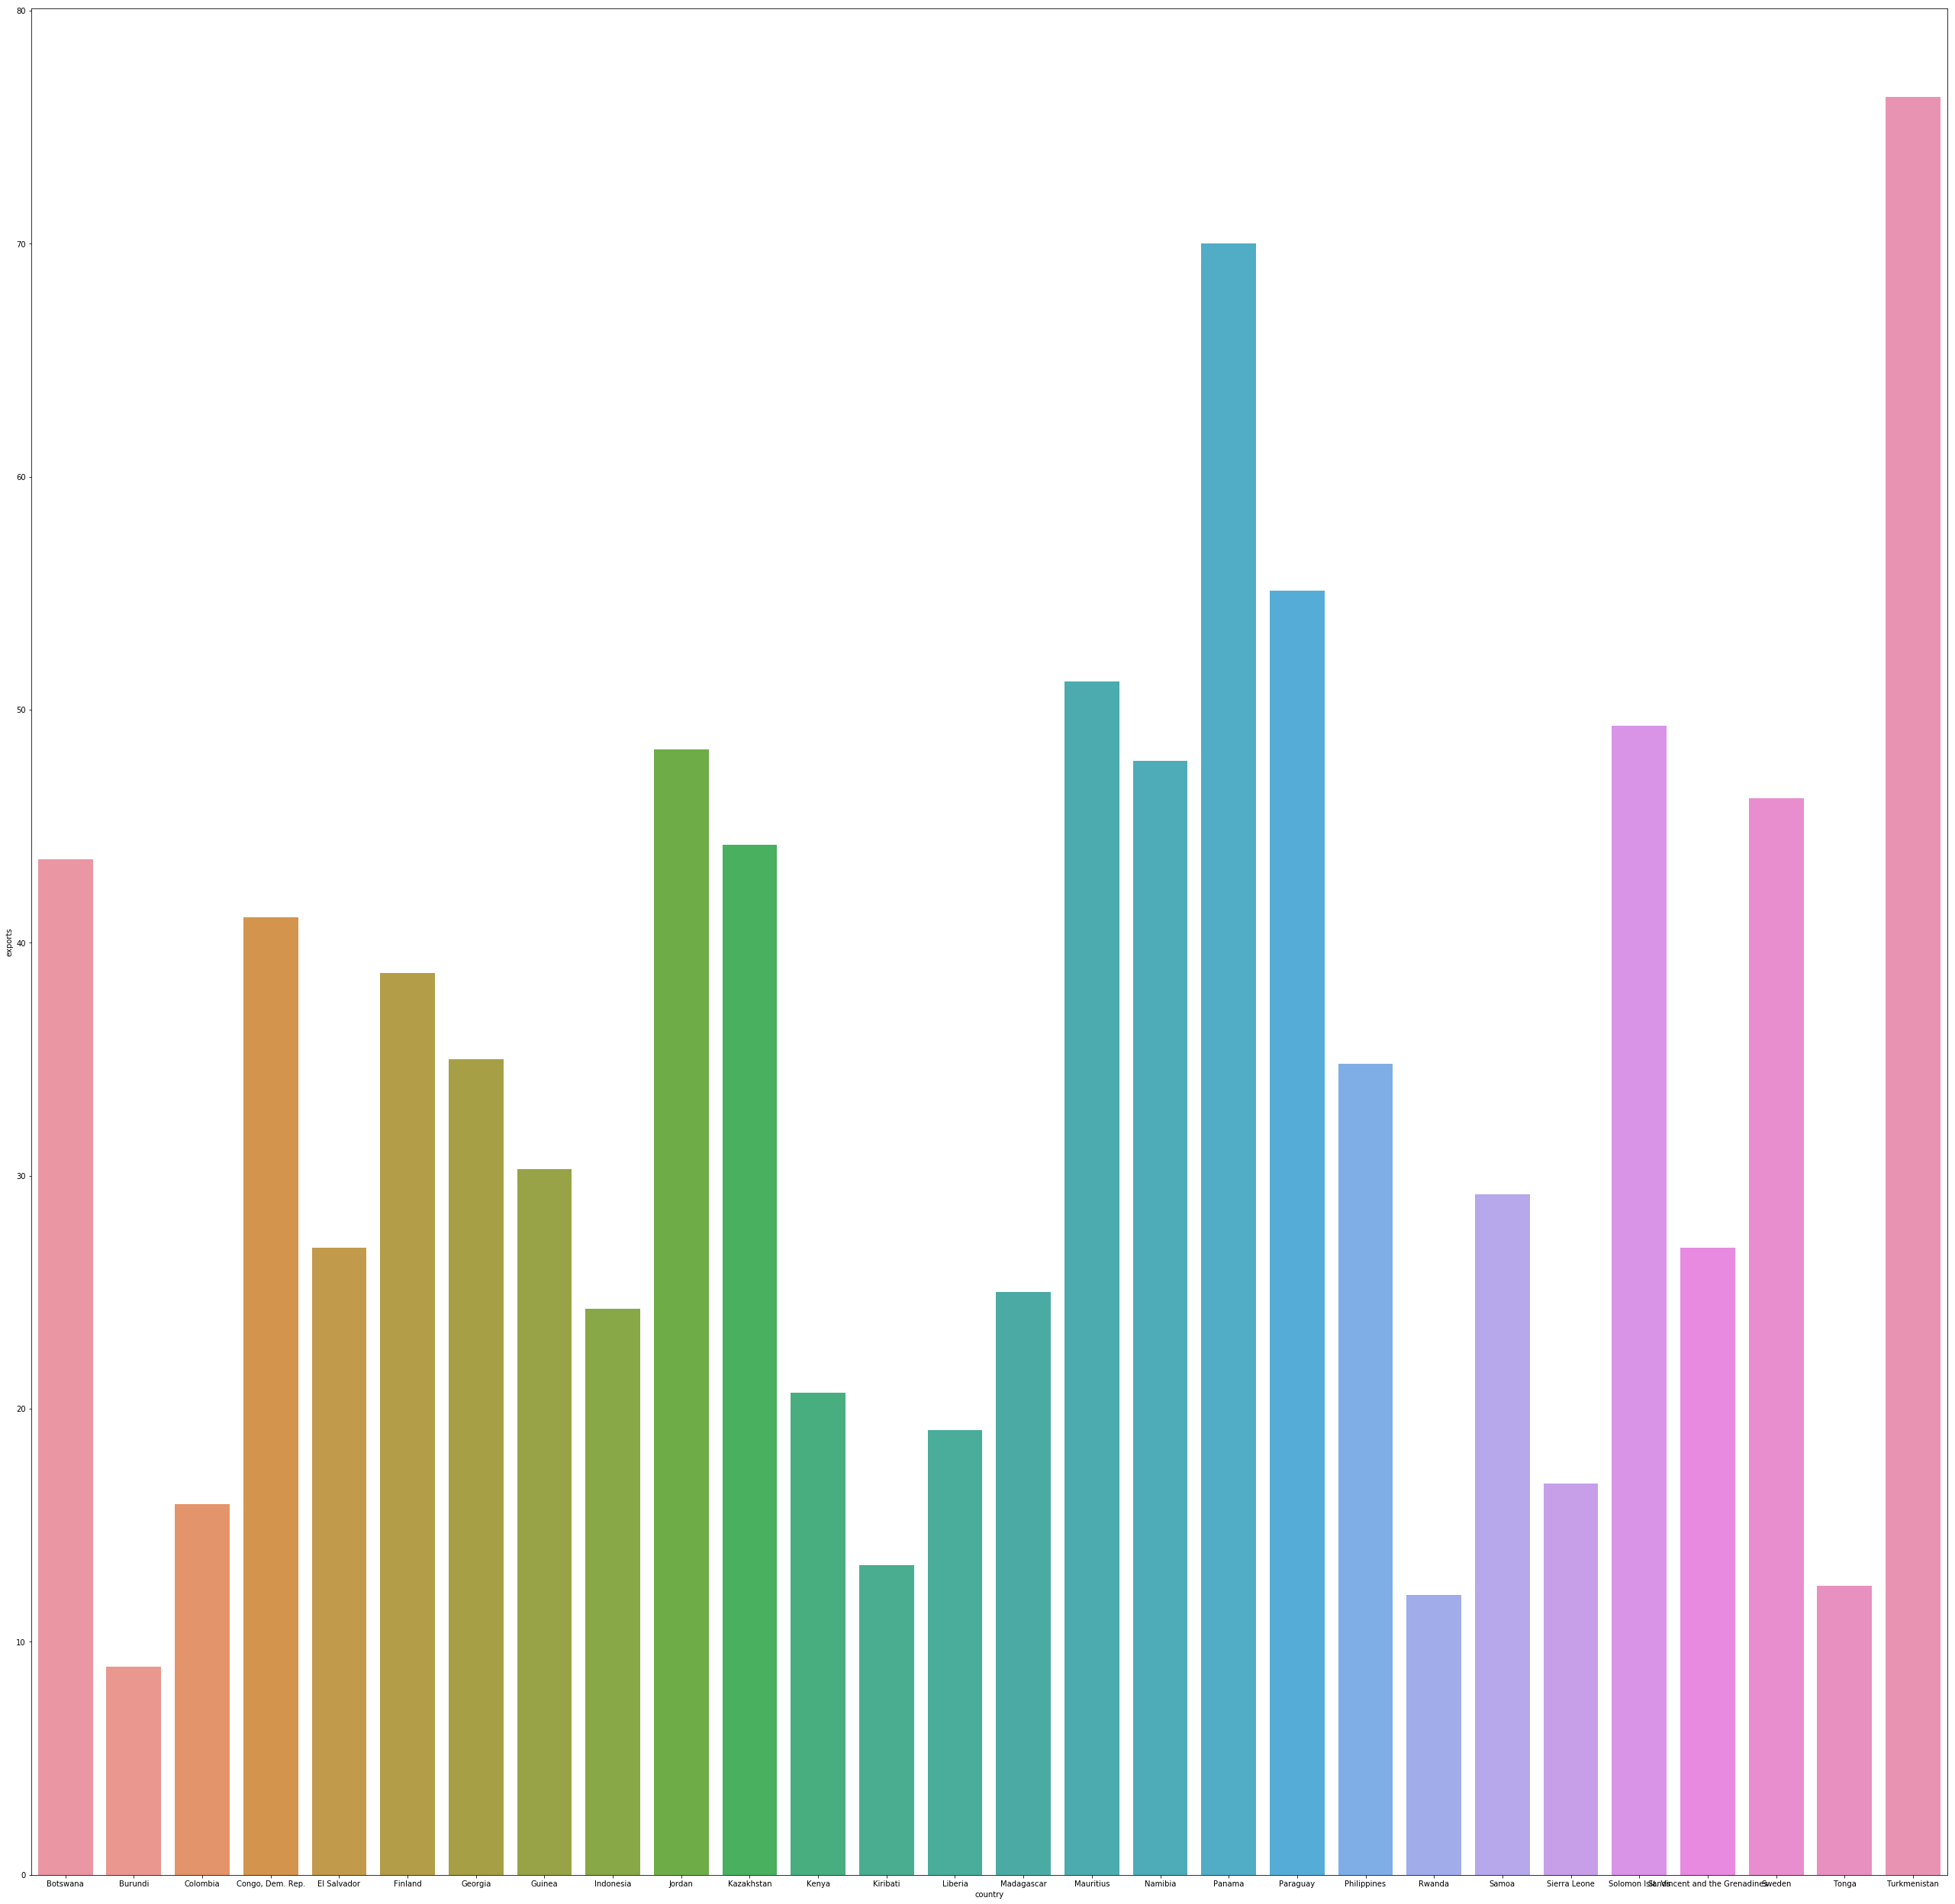

In [116]:
# Plotting countries of Cluster 0 for exports
df_km6=df_km5[['country','exports']][df_km5.ClusterID==2]
plt.figure(figsize=(45,45))   
sns.barplot(x=df_km6.country, y=df_km6.exports)

#### We can see that only exception are Switzerland and Libya having high income, high GDP , low Child Mortality. It seems that K=5 and Cluster = 2 seems to be better option to find for countries needing aid.

## Heirarchical Clustering

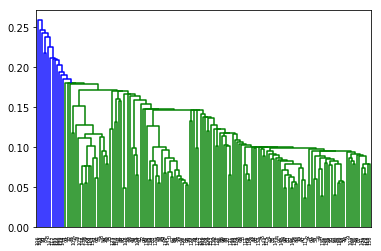

In [91]:
# heirarchical clustering
mergings = linkage(df_k, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

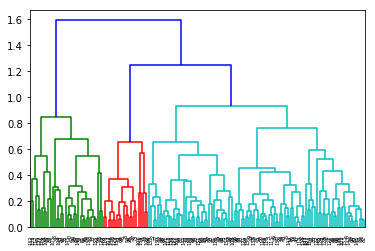

In [92]:
### Plot the dendrogram for complete Method and euclidean Method:-

mergings = linkage(df_k, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [93]:
df_pc

,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.598986,0.095540,0.157659,0.023049,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,-0.158432,-0.212781,-0.063284,0.060389,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,-0.003812,-0.135260,-0.133676,-0.134469,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,0.650130,0.276708,-0.143587,-0.154404,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,-0.200758,-0.065625,-0.099946,0.036499,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,-0.112642,-0.204061,0.119142,-0.106585,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,-0.087379,-0.244904,-0.153060,-0.012485,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,-0.440672,0.017764,0.268551,-0.227395,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,-0.520449,0.115801,0.242977,-0.001728,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,-0.038662,-0.121110,-0.079525,-0.061486,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [94]:
## Cut the Cluster for Cluster=5
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_hc = pd.concat([df_pc, clusterCut], axis=1)


In [95]:
df_hc.columns = [ 'PC1', 'PC2', 'PC3','PC4' ,'country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [96]:
#summarise the DF

km_clusters_child_mort = 	pd.DataFrame(df_hc.groupby(['ClusterID']).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_hc.groupby(['ClusterID']).exports.mean())
km_clusters_imports = 	pd.DataFrame(df_hc.groupby(['ClusterID']).imports.mean())
km_clusters_health = 	pd.DataFrame(df_hc.groupby(['ClusterID']).health.mean())
km_clusters_income = 	pd.DataFrame(df_hc.groupby(['ClusterID']).income.mean())
km_clusters_inflation = 	pd.DataFrame(df_hc.groupby(['ClusterID']).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(df_hc.groupby(['ClusterID']).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_hc.groupby(['ClusterID']).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(df_hc.groupby(['ClusterID']).gdpp.mean())




In [97]:
### Check the Mean for each Cluster 
df_5_hc = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df_5_hc.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean" ]
df_5_hc.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,52.327273,32.227273,6.730909,42.404545,11134.000000,5.692864,67.709091,3.436364,8570.409091
1,1,36.340000,37.323436,6.234000,40.713925,14952.363636,9.628873,71.169091,2.875455,9834.945455
2,2,37.920513,37.151538,6.996923,48.756410,12509.923077,6.147769,70.810256,3.155641,10575.846154
3,3,34.790000,47.625000,7.536000,50.835000,23503.900000,4.604400,71.510000,2.585000,22678.150000
4,4,46.720000,35.220000,7.338000,43.770000,11758.000000,7.833000,68.340000,3.072000,7086.200000


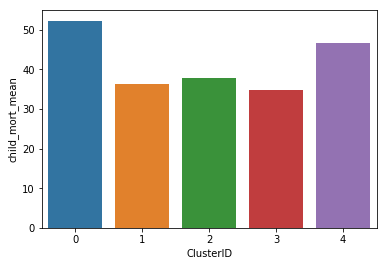

In [98]:
# Barplot for child mortality mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.child_mort_mean)

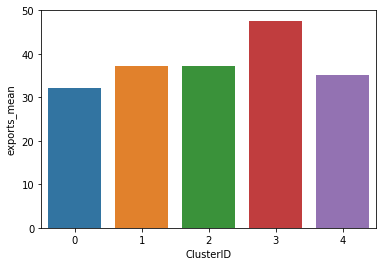

In [99]:
# Barplot for exports mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.exports_mean)

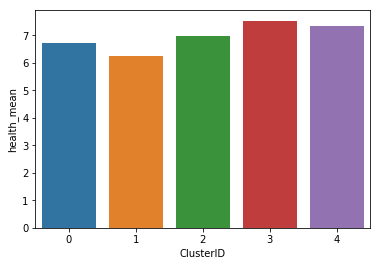

In [100]:
# Barplot for health mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.health_mean)

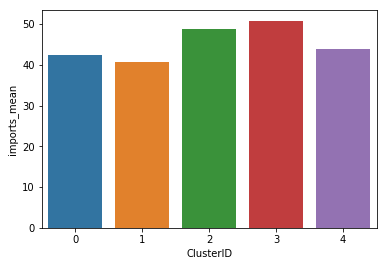

In [101]:
# Barplot for imports mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.imports_mean)

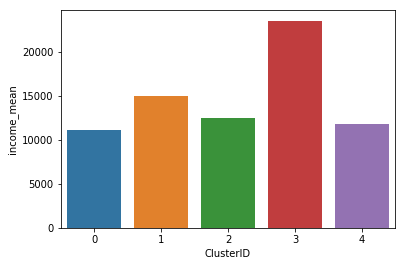

In [102]:
# Barplot for income mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.income_mean)

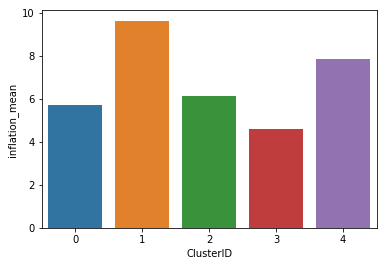

In [103]:
# Barplot for inflation mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.inflation_mean)

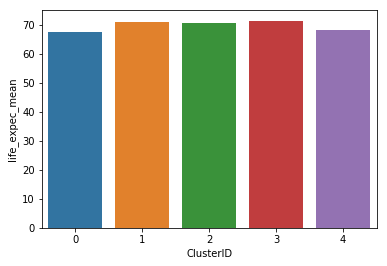

In [104]:
# Barplot for life expec mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.life_expec_mean)

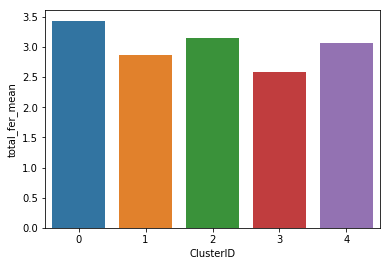

In [105]:
# Barplot for total fertility mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.total_fer_mean)

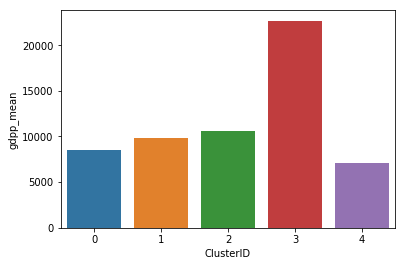

In [106]:
# Barplot for gdpp mean for different clusters
sns.barplot(x=df_5_hc.ClusterID, y=df_5_hc.gdpp_mean)

#### Based on the Barplot we can see that gdpp, income, child mortality and export are deciding and significant features to judge the countries that are in the direst need of aid

#### Also we can see based on above parameters and barplot that countries in cluster 0 are in more need of aid

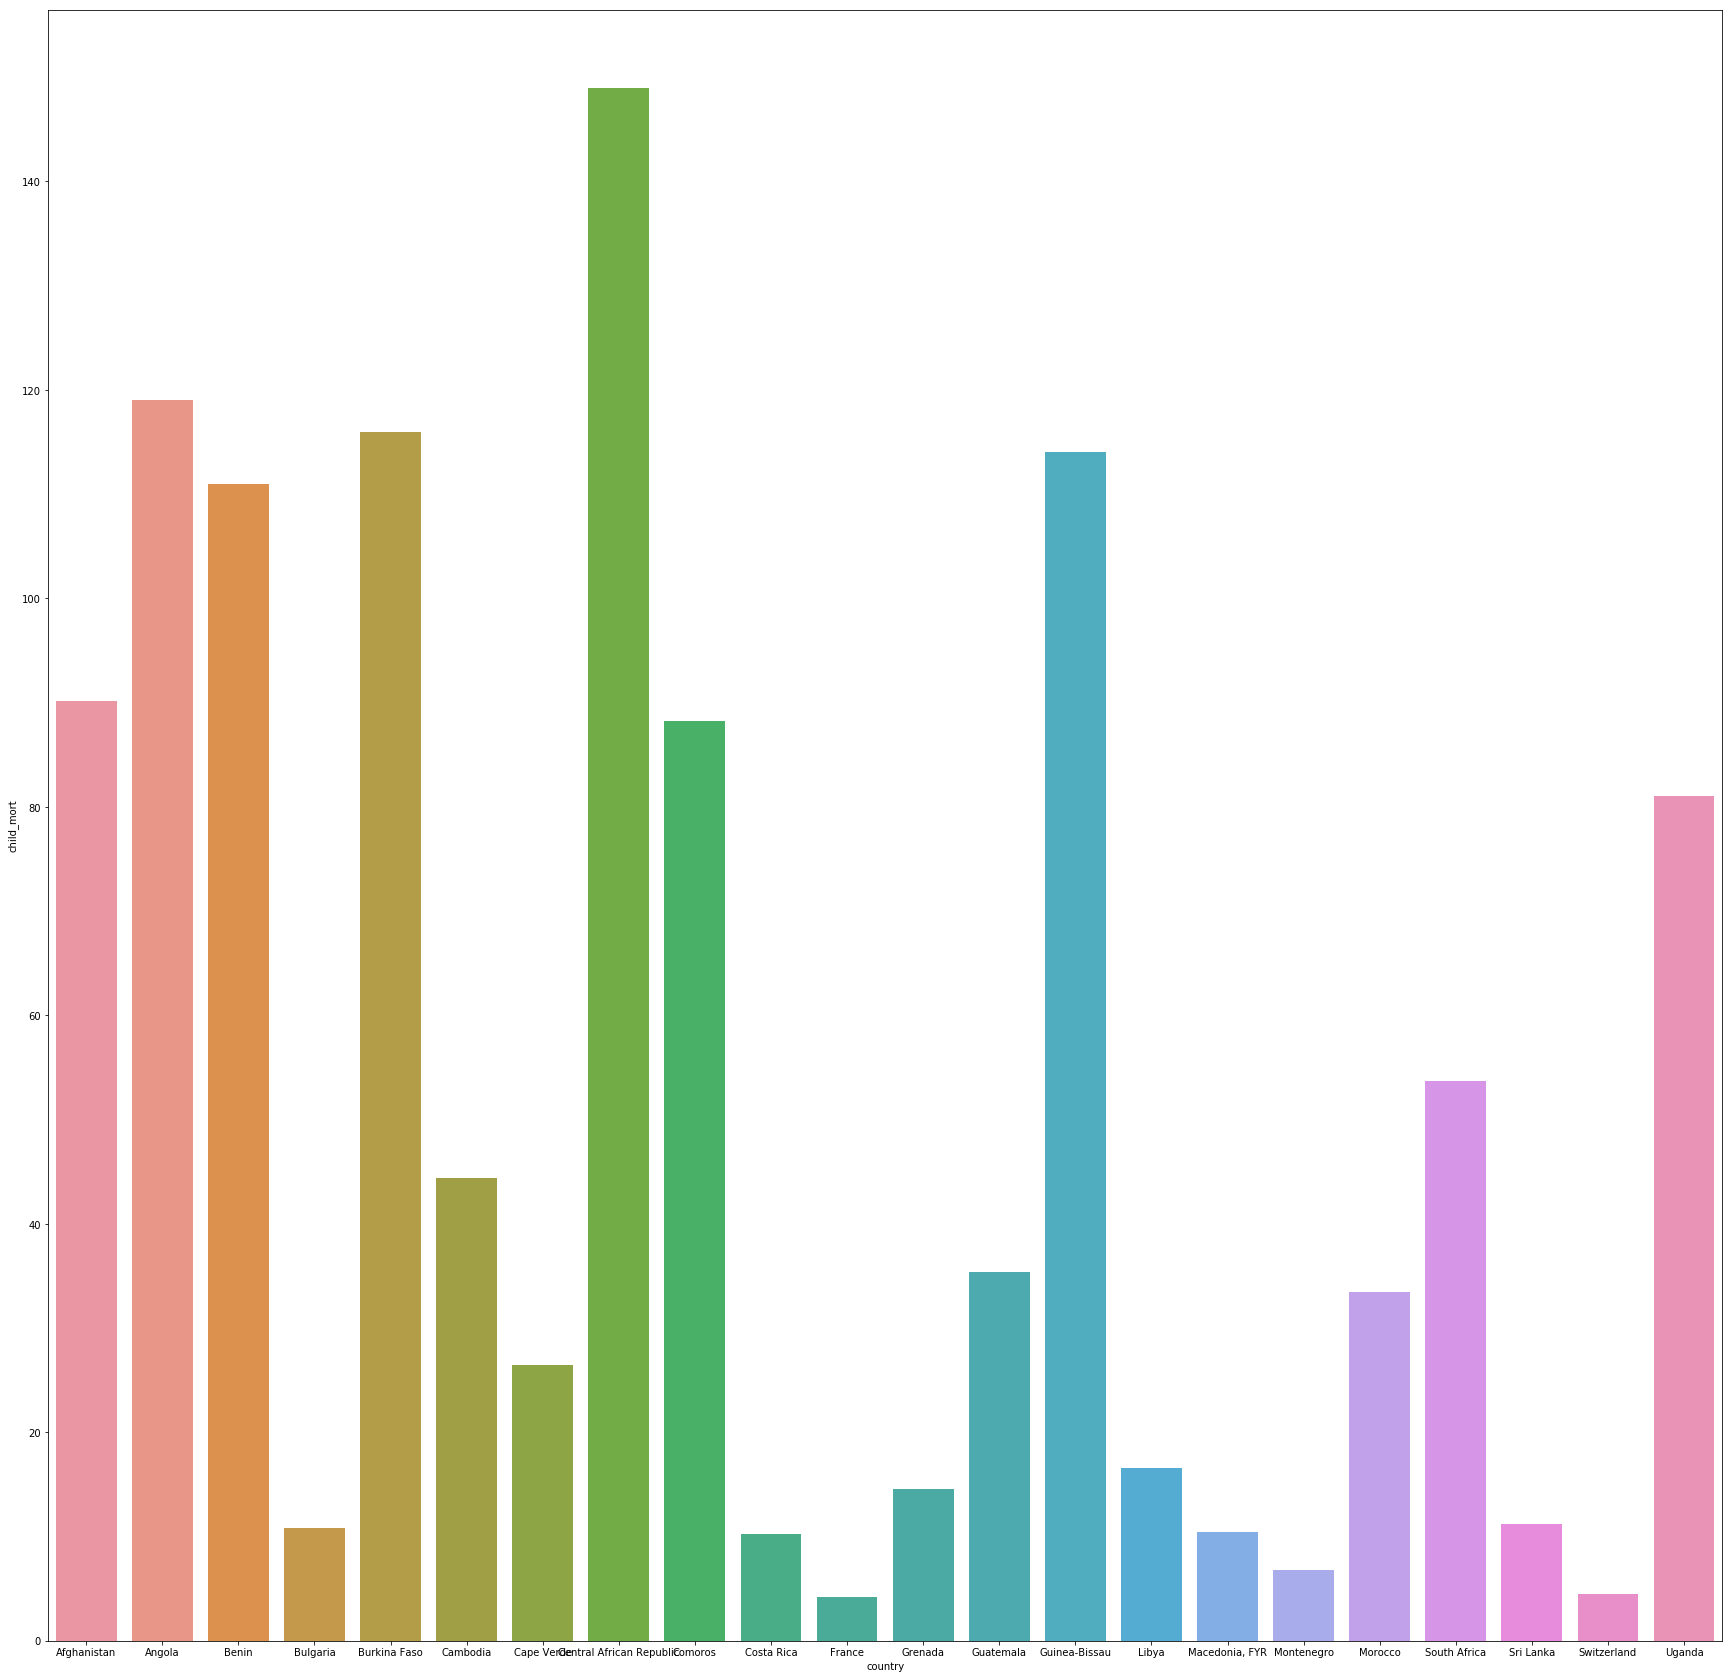

In [107]:
# Plotting countries of Cluster 0 for child mortality
df_hc1=df_hc[['country','child_mort']][df_hc.ClusterID==0]
plt.figure(figsize=(30,30))   
sns.barplot(x=df_hc1.country, y=df_hc1.child_mort)

                      country   income
0                 Afghanistan   1610.0
3                      Angola   5900.0
17                      Benin   1820.0
24                   Bulgaria  15300.0
25               Burkina Faso   1430.0
27                   Cambodia   2520.0
30                 Cape Verde   5830.0
31   Central African Republic    888.0
36                    Comoros   1410.0
39                 Costa Rica  13000.0
54                     France  36900.0
61                    Grenada  11200.0
62                  Guatemala   6710.0
64              Guinea-Bissau   1390.0
89                      Libya  29600.0
92             Macedonia, FYR  11400.0
98                        NaN      NaN
104                Montenegro  14000.0
105                   Morocco   6440.0
123                       NaN      NaN
137              South Africa  12000.0
140                 Sri Lanka   8560.0
145               Switzerland  55500.0
155                    Uganda   1540.0


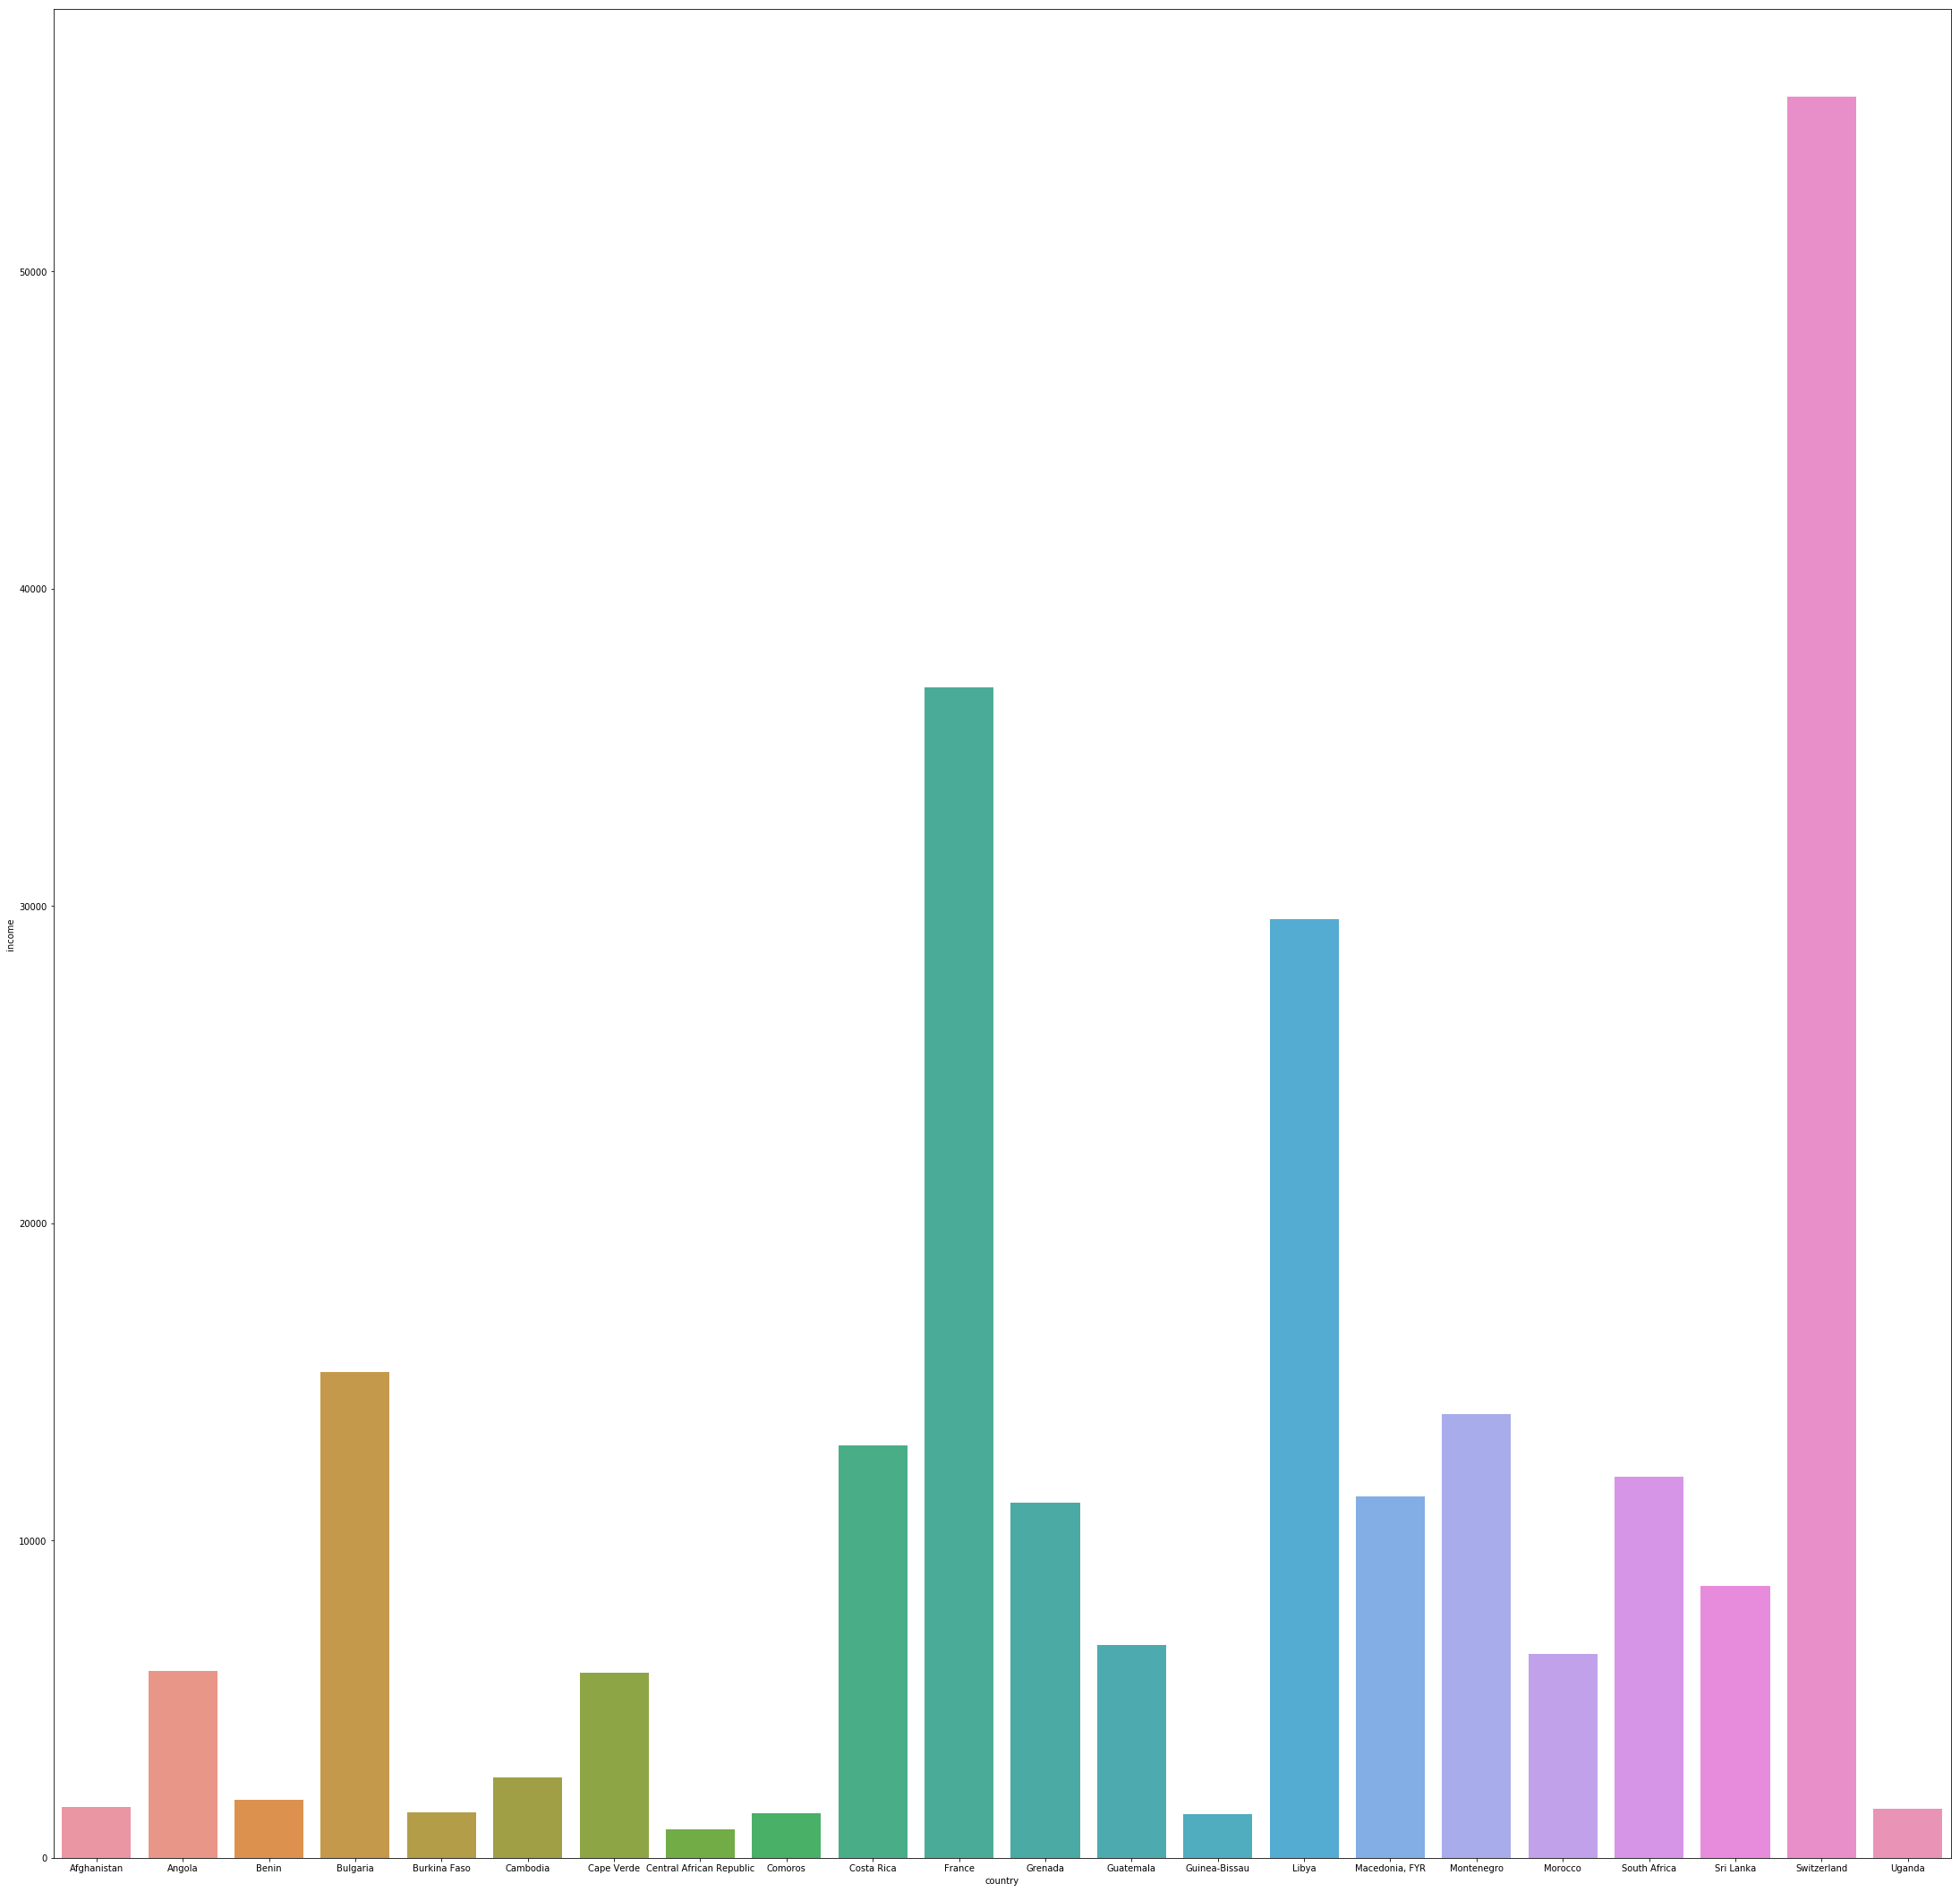

In [108]:
print(df_hc[['country','income']][df_hc.ClusterID==0])
df_hc1=df_hc[['country','income']][df_hc.ClusterID==0]
plt.figure(figsize=(38,38))   
sns.barplot(x=df_hc1.country, y=df_hc1.income)

                      country     gdpp
0                 Afghanistan    553.0
3                      Angola   3530.0
17                      Benin    758.0
24                   Bulgaria   6840.0
25               Burkina Faso    575.0
27                   Cambodia    786.0
30                 Cape Verde   3310.0
31   Central African Republic    446.0
36                    Comoros    769.0
39                 Costa Rica   8200.0
54                     France  40600.0
61                    Grenada   7370.0
62                  Guatemala   2830.0
64              Guinea-Bissau    547.0
89                      Libya  12100.0
92             Macedonia, FYR   4540.0
98                        NaN      NaN
104                Montenegro   6680.0
105                   Morocco   2830.0
123                       NaN      NaN
137              South Africa   7280.0
140                 Sri Lanka   2810.0
145               Switzerland  74600.0
155                    Uganda    595.0


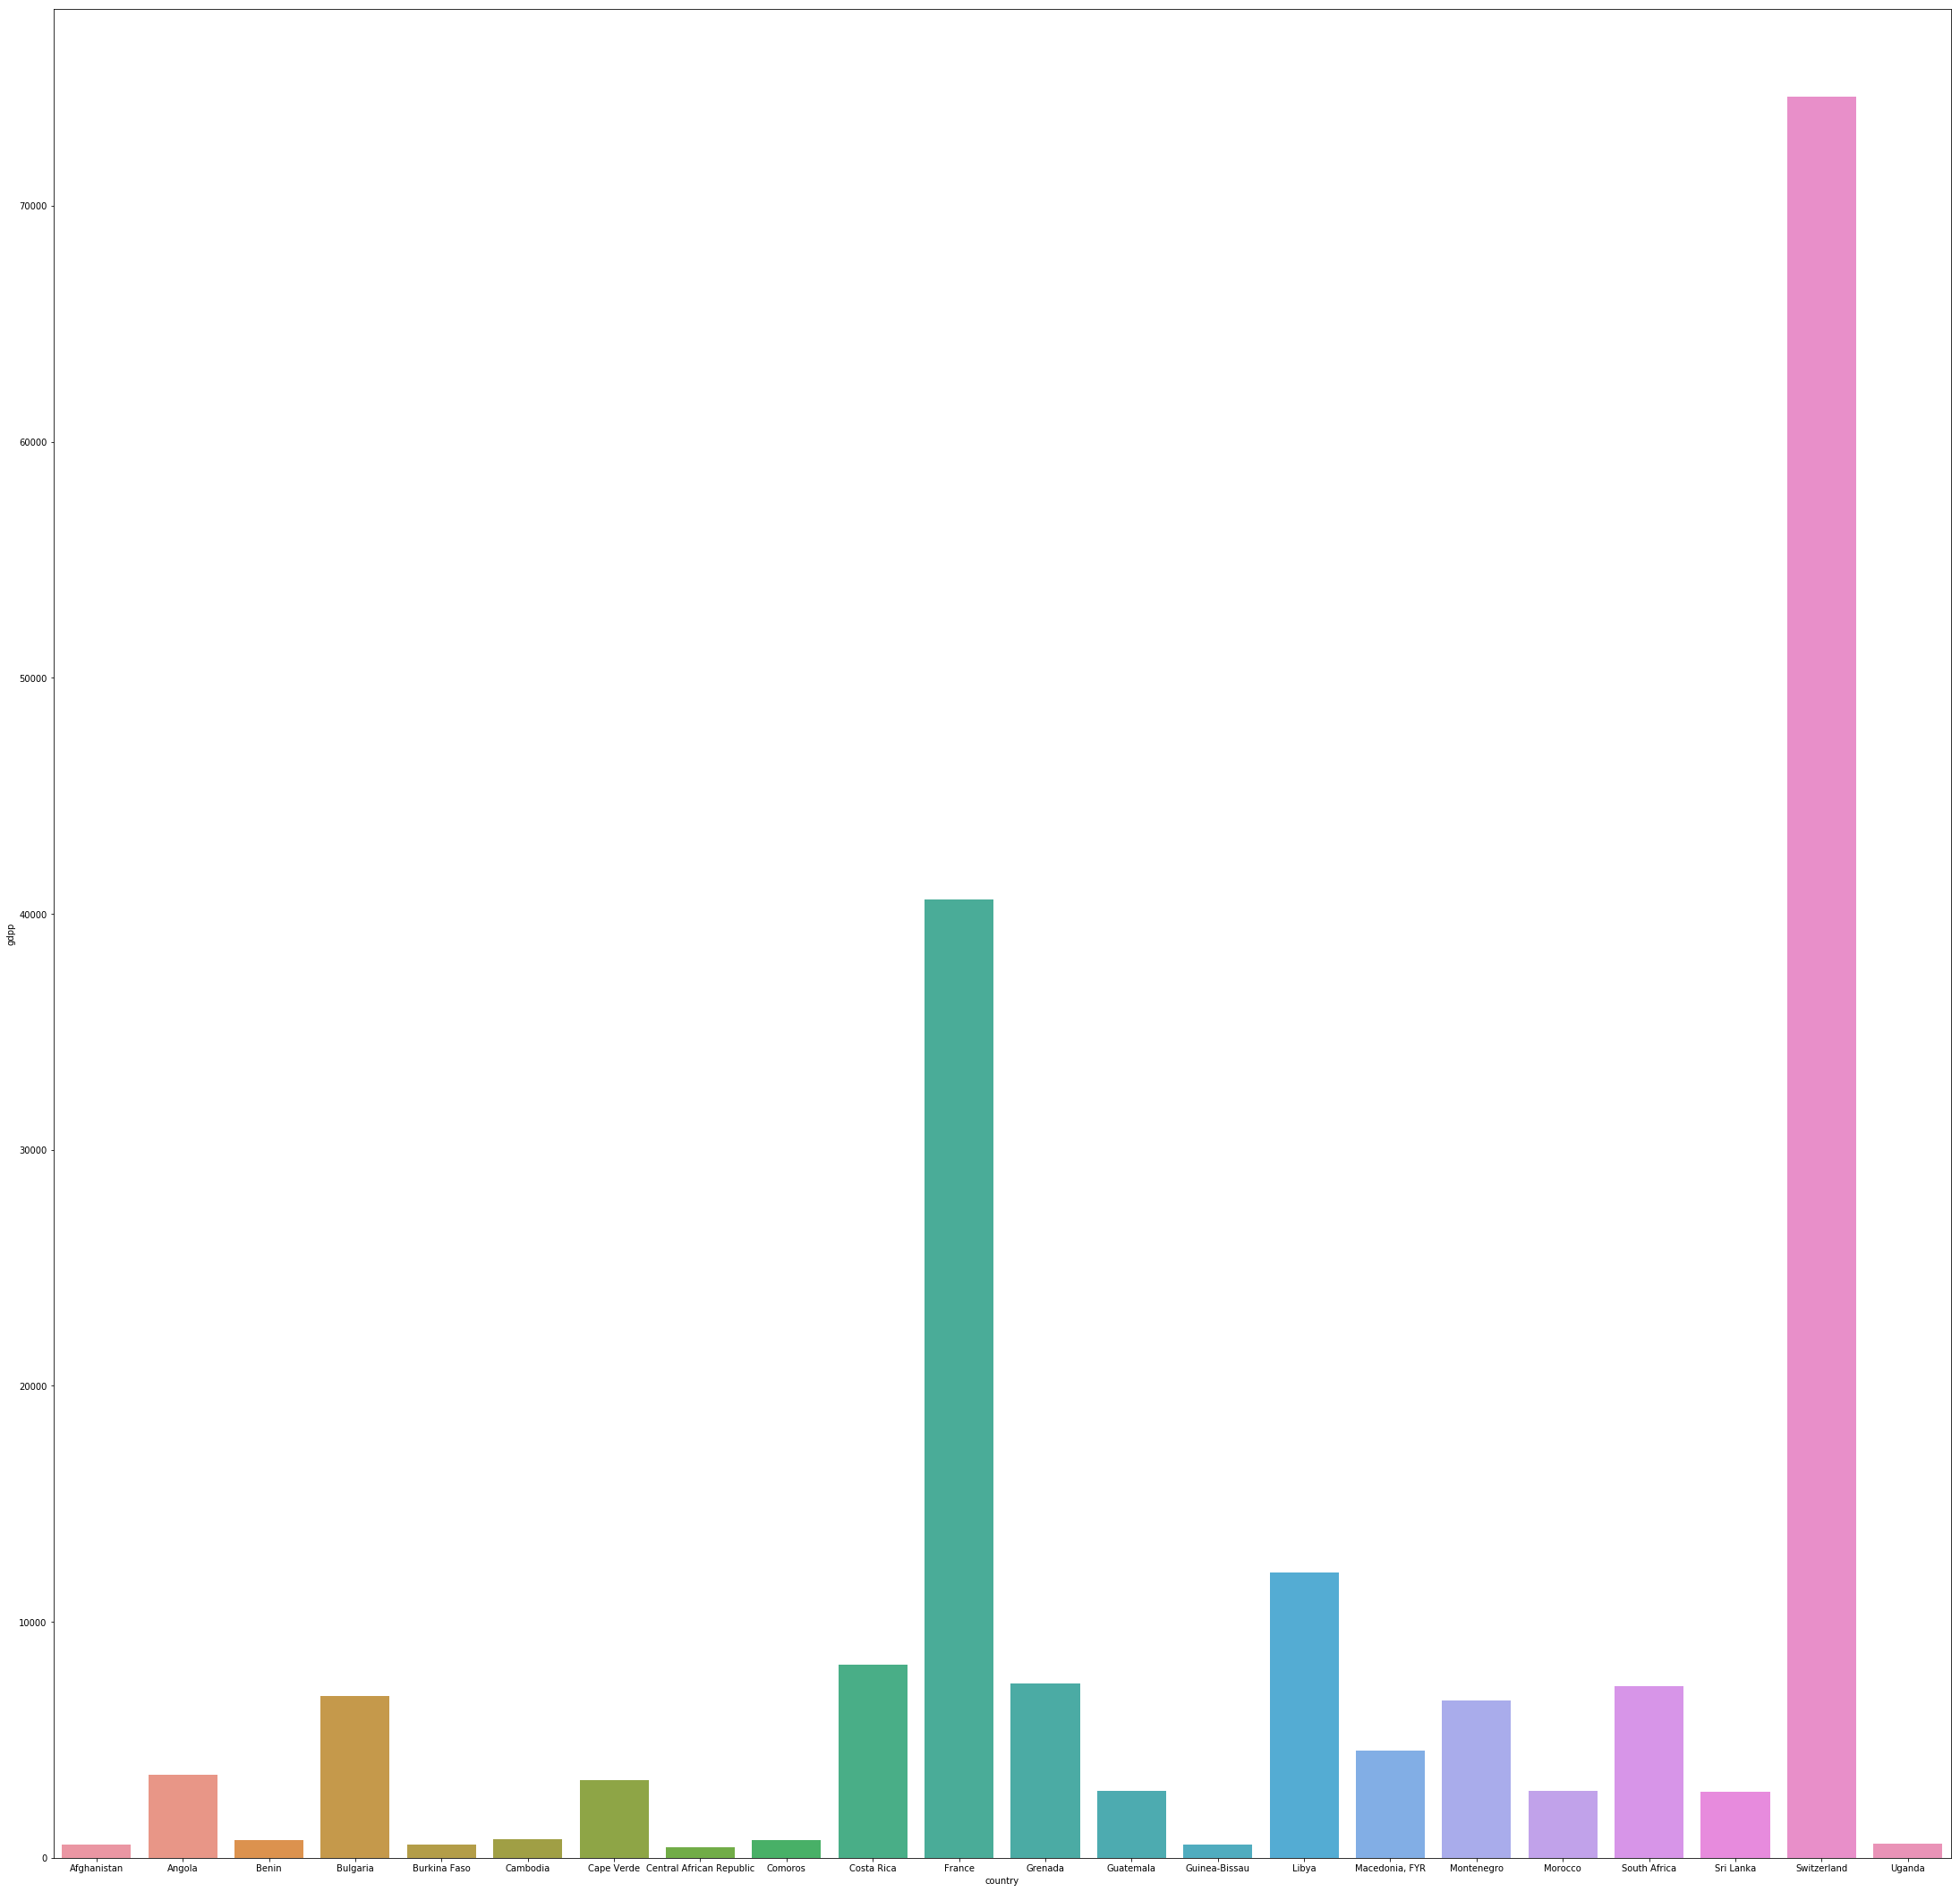

In [109]:
print(df_hc[['country','gdpp']][df_hc.ClusterID==0])
df_hc1=df_hc[['country','gdpp']][df_hc.ClusterID==0]
plt.figure(figsize=(38,38))   
sns.barplot(x=df_hc1.country, y=df_hc1.gdpp)

#### We can see that only exception are Switzerland and Libya having high income, high GDP , low Child Mortality. It seems that K=5 and Cluster = 0 seems to be better option to find for countries needing aid.

### Final Result:

#### Based on K-Means Cluster 2 and K= 5 are optimum countries to get aid.